In [1]:
import pandas as pd
import numpy as np

# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
article_data = pd.read_csv("data/texts.csv", delimiter=',')

#article_data = pd.read_excel("data/features.xls")

article_data.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity;;
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109.0,0.0,1.0,7.0,9.0,0.0,5.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18;;
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309.0,21.0,4.0,1.0,19.0,1.0,4.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14;;
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149.0,6.0,1.0,8.0,14.0,0.0,5.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18;;
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305.0,18.0,5.0,7.0,26.0,0.0,10.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20;;
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491.0,23.0,8.0,33.0,47.0,0.0,12.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24;;


In [3]:
article_data.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,...,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,694.370594,38.810675,13.843907,20.538771,66.202417,1.046324,11.369587,74.752266,47.269889,2.132931,...,4.322256,2.688822,19.093656,5.389728,29.918429,4.349446,17.019134,11.805639,0.927492,0.994965
std,522.118710,32.060622,13.545949,22.696782,51.956638,1.655839,12.572746,55.602773,38.370746,2.818153,...,6.605905,4.816057,16.694549,5.752644,25.288903,5.098796,17.739849,12.269056,0.259457,0.070816
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,13.000000,4.000000,7.000000,24.000000,0.000000,3.000000,31.000000,19.000000,0.000000,...,0.000000,0.000000,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000
50%,624.000000,33.000000,10.000000,14.000000,57.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,2.000000,1.000000,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000
75%,950.000000,56.000000,20.000000,26.000000,93.000000,1.000000,15.000000,102.000000,65.000000,3.000000,...,6.000000,3.000000,28.000000,8.000000,44.000000,6.000000,25.000000,18.000000,1.000000,1.000000
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,80.000000,44.000000,127.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000


# Cleaning Data

In [4]:
article_data.columns

Index(['TextID', 'URL', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'baseform',
       'Quotes', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas',
       'semicolon', 'colon', 'ellipsis', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd',
       'present1st2nd', 'sentence1st', 'sentencelast', 'txtcomplexity;;'],
      dtype='object')

In [5]:
# Remove the ';;' that were added by the reader at the end

article_data.rename(columns={'txtcomplexity;;': 'txtcomplexity'}, inplace=True)
article_data['txtcomplexity'] = article_data['txtcomplexity'].str.replace(';;', '')
article_data['txtcomplexity'] = article_data['txtcomplexity'].str.replace(';', '')

article_data.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109.0,0.0,1.0,7.0,9.0,0.0,5.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309.0,21.0,4.0,1.0,19.0,1.0,4.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149.0,6.0,1.0,8.0,14.0,0.0,5.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305.0,18.0,5.0,7.0,26.0,0.0,10.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491.0,23.0,8.0,33.0,47.0,0.0,12.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24


In [6]:
# This line tells the notebook to show plots inside of the notebook
#article_data.corr()[Label]

print(article_data.columns)

article_data = article_data.drop('URL', axis=1)

print(article_data.columns)

Index(['TextID', 'URL', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'baseform',
       'Quotes', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas',
       'semicolon', 'colon', 'ellipsis', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd',
       'present1st2nd', 'sentence1st', 'sentencelast', 'txtcomplexity'],
      dtype='object')
Index(['TextID', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VB

In [7]:
indicators = article_data.drop(['TextID', 'Label'], axis=1)
labels = article_data['Label']

In [8]:
if article_data.isnull().any().any():
    print('Missing values')
else:
    print('No Missing values')

Missing values


In [9]:


null_mask = article_data.isnull().any(axis=1)
null_rows = article_data[null_mask]
null_rows



,TextID,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
460,"Text0481,""http://www.chicagotribune.com/sports...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,"Text0550,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,"Text0661,""http://www.skysports.com/story/0,195...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,"Text0694,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,"Text0695,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,"Text0713,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,"Text0981,""http://www.skysports.com/opinion/sto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#a new pandas dataframe with all rows containing missing values dropped from the original article_data dataframe

article_data = article_data.dropna()

In [11]:
#Label to binary
article_data['Label'] = article_data['Label'].map({'subjective': 1, 'objective': 0})
article_data['Label'] = article_data['Label'].astype(int)

In [12]:
#update the indicators and labels to not count the NaN columns

indicators = article_data.drop(['TextID', 'Label'], axis=1)
labels = article_data['Label']

In [13]:
if article_data.isnull().any().any():
    print('Missing values')
else:
    print('No Missing values')
    


No Missing values


In [14]:
print(article_data.iloc[460])

TextID               Text0482
Label                       0
totalWordsCount         485.0
semanticobjscore         11.0
semanticsubjscore         5.0
                       ...   
present3rd                5.0
present1st2nd             9.0
sentence1st               1.0
sentencelast              1.0
txtcomplexity              10
Name: 461, Length: 61, dtype: object


In [15]:
row = article_data[article_data["TextID"] == "Text0481"]
print(row)

#The problematic row was deleted


Empty DataFrame
Columns: [TextID, Label, totalWordsCount, semanticobjscore, semanticsubjscore, CC, CD, DT, EX, FW, INs, JJ, JJR, JJS, LS, MD, NN, NNP, NNPS, NNS, PDT, POS, PRP, PRP$, RB, RBR, RBS, RP, SYM, TOs, UH, VB, VBD, VBG, VBN, VBP, VBZ, WDT, WP, WP$, WRB, baseform, Quotes, questionmarks, exclamationmarks, fullstops, commas, semicolon, colon, ellipsis, pronouns1st, pronouns2nd, pronouns3rd, compsupadjadv, past, imperative, present3rd, present1st2nd, sentence1st, sentencelast, txtcomplexity]
Index: []

[0 rows x 61 columns]


In [16]:
# A tuple containing the number of rows and columns in the indicators dataset

indicators.shape

(993, 59)

In [17]:
indicators.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   totalWordsCount    993 non-null    float64
 1   semanticobjscore   993 non-null    float64
 2   semanticsubjscore  993 non-null    float64
 3   CC                 993 non-null    float64
 4   CD                 993 non-null    float64
 5   DT                 993 non-null    float64
 6   EX                 993 non-null    float64
 7   FW                 993 non-null    float64
 8   INs                993 non-null    float64
 9   JJ                 993 non-null    float64
 10  JJR                993 non-null    float64
 11  JJS                993 non-null    float64
 12  LS                 993 non-null    float64
 13  MD                 993 non-null    float64
 14  NN                 993 non-null    float64
 15  NNP                993 non-null    float64
 16  NNPS               993 non

In [18]:
indicators.head()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,109.0,0.0,1.0,7.0,9.0,0.0,5.0,8.0,6.0,0.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18
1,309.0,21.0,4.0,1.0,19.0,1.0,4.0,35.0,23.0,0.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14
2,149.0,6.0,1.0,8.0,14.0,0.0,5.0,15.0,11.0,0.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18
3,305.0,18.0,5.0,7.0,26.0,0.0,10.0,37.0,21.0,1.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20
4,491.0,23.0,8.0,33.0,47.0,0.0,12.0,61.0,36.0,0.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24


In [19]:
indicators.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns1st,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast
count,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,...,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,694.370594,38.810675,13.843907,20.538771,66.202417,1.046324,11.369587,74.752266,47.269889,2.132931,...,4.322256,2.688822,19.093656,5.389728,29.918429,4.349446,17.019134,11.805639,0.927492,0.994965
std,522.118710,32.060622,13.545949,22.696782,51.956638,1.655839,12.572746,55.602773,38.370746,2.818153,...,6.605905,4.816057,16.694549,5.752644,25.288903,5.098796,17.739849,12.269056,0.259457,0.070816
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,13.000000,4.000000,7.000000,24.000000,0.000000,3.000000,31.000000,19.000000,0.000000,...,0.000000,0.000000,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000
50%,624.000000,33.000000,10.000000,14.000000,57.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,2.000000,1.000000,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000
75%,950.000000,56.000000,20.000000,26.000000,93.000000,1.000000,15.000000,102.000000,65.000000,3.000000,...,6.000000,3.000000,28.000000,8.000000,44.000000,6.000000,25.000000,18.000000,1.000000,1.000000
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,80.000000,44.000000,127.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000


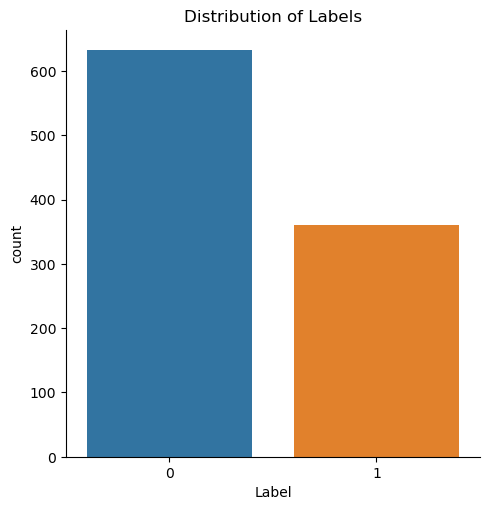

In [20]:
# Distribution of Labels

sb.catplot(x='Label', kind='count', data=article_data)


plt.title('Distribution of Labels')
plt.show()

In [21]:
# almost all data is numerical, 
# except for the "sentence1st" and "sentencelast" that are binary indicators that are the class of the respective sentence
# these classes are


nums = indicators.drop(['sentence1st', 'sentencelast'], axis=1).columns


In [22]:
print("First sentence")

indicators['sentence1st'].value_counts()

First sentence


1.0    921
0.0     72
Name: sentence1st, dtype: int64

In [23]:
print("Last sentence")

indicators['sentencelast'].value_counts()

Last sentence


1.0    988
0.0      5
Name: sentencelast, dtype: int64

# Feature Selection


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
# data normalization
normalizer = MinMaxScaler()

#Training set e Test set
ind_train, ind_test, l_train, l_test = train_test_split(indicators, labels, random_state=23, stratify=labels)

# Scale the data
# (prevent features from "dominating" the model)
ind_train.loc[:, nums] = normalizer.fit_transform(ind_train[nums])
ind_test.loc[:, nums] = normalizer.transform(ind_test[nums])





In [26]:
# VARIANCE
variance = ind_train.var()

# sort variance
variance = variance.sort_values()
# get 10 lower variances
variance[:10]

NNP                 0.000000
WRB                 0.000000
ellipsis            0.001344
JJS                 0.003012
sentencelast        0.005355
semicolon           0.005632
colon               0.005998
PDT                 0.006404
exclamationmarks    0.006838
pronouns1st         0.006966
dtype: float64

Low variance variables are those that do not vary much across the dataset, meaning that their values remain mostly the same for all instances. These variables do not provide much information to the model and can lead to overfitting, where the model fits too closely to the training data and does not generalize well to new, unseen data.

In [27]:
ind_train['NNP'].value_counts()

0.0    744
Name: NNP, dtype: int64

In [28]:
ind_train['WRB'].value_counts()

0.0    744
Name: WRB, dtype: int64

In [29]:
ind_train['ellipsis'].value_counts()

0.0    743
1.0      1
Name: ellipsis, dtype: int64

In [30]:
ind_train['JJS'].value_counts()

0.00    739
0.25      2
0.75      2
1.00      1
Name: JJS, dtype: int64

In [31]:
ind_train['sentencelast'].value_counts()

1.0    740
0.0      4
Name: sentencelast, dtype: int64

The previous features showed a very low variance, so we decided to drop them

In [32]:
ind_train['semicolon'].value_counts()

0.000000    650
0.066667     48
0.133333     23
0.200000     10
0.266667      6
0.933333      1
0.600000      1
1.000000      1
0.466667      1
0.400000      1
0.533333      1
0.333333      1
Name: semicolon, dtype: int64

In other hand, the 'semicolon' column shows a larger variance, for now we will not maintain it, but we might go back in this decision if the model demands it

In [33]:
ind_train['colon'].value_counts()

0.000000    342
0.023810    171
0.047619     85
0.071429     53
0.095238     31
0.119048     21
0.142857     13
0.166667      7
0.214286      5
0.285714      4
0.238095      2
0.261905      2
0.785714      1
0.190476      1
0.357143      1
0.333333      1
0.547619      1
0.309524      1
0.904762      1
1.000000      1
Name: colon, dtype: int64

The 'colon' feature shows an even larger variance, so from this one on, we will maintain the features 

In [34]:
low_var_indicators = ['NNP', 'WRB', 'ellipsis', 'JJS', 'sentencelast', 'semicolon']

In [35]:
ind_train.drop(low_var_indicators, axis=1, inplace=True)
ind_test.drop(low_var_indicators, axis=1, inplace=True)

In [36]:
# set figure size for better visibility
sb.set(rc={'figure.figsize':(15,11)})

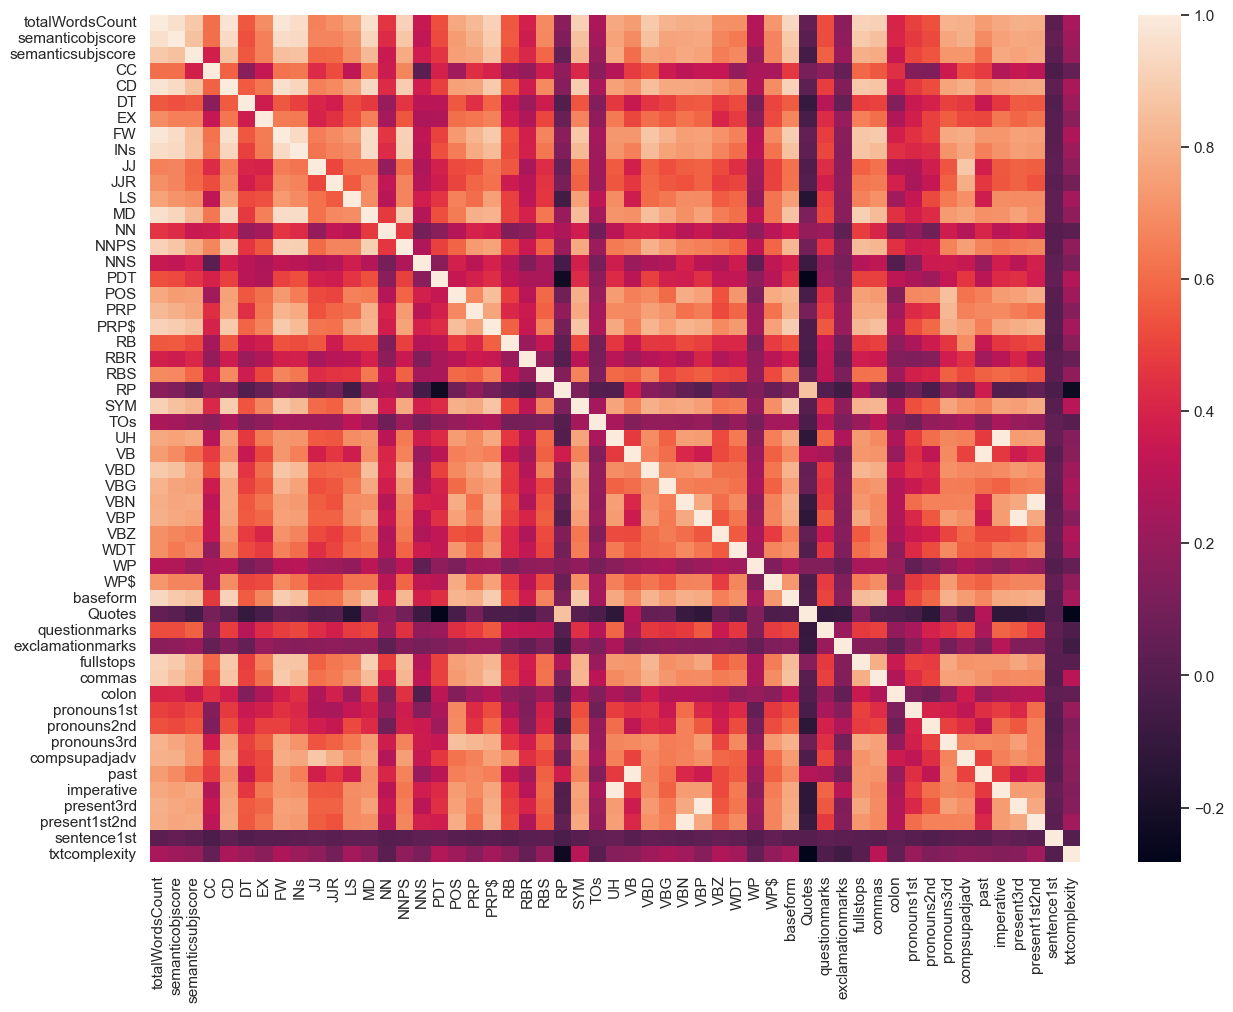

In [37]:
# CORRELATION

correlation_matrix = ind_train.corr()

# show the matrix
#sb.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

sb.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.show()


The heatmap above describes with more detail the correlation between the columns, since it matches in pairs every single one of them

In [38]:
# Pearson measures both strength and direction of the correlation
# use abs() as we only care about the amplitude

corr_series = ind_train.corr(method='pearson').abs().unstack().sort_values(ascending=False)

In [39]:
# the first 53 elements will obviously be the correlation of features with themselves, we can ignore that
corr_series[:53]

totalWordsCount    totalWordsCount      1.0
NNPS               NNPS                 1.0
SYM                SYM                  1.0
RP                 RP                   1.0
RBS                RBS                  1.0
RBR                RBR                  1.0
RB                 RB                   1.0
PRP$               PRP$                 1.0
PRP                PRP                  1.0
POS                POS                  1.0
PDT                PDT                  1.0
NNS                NNS                  1.0
NN                 NN                   1.0
VB                 VB                   1.0
MD                 MD                   1.0
LS                 LS                   1.0
JJR                JJR                  1.0
JJ                 JJ                   1.0
INs                INs                  1.0
FW                 FW                   1.0
EX                 EX                   1.0
DT                 DT                   1.0
CD                 CD           

In [40]:
corr_series[53:70]

VB                past               0.999990
past              VB                 0.999990
present1st2nd     VBN                0.999922
VBN               present1st2nd      0.999922
present3rd        VBP                0.999893
VBP               present3rd         0.999893
imperative        UH                 0.997622
UH                imperative         0.997622
FW                totalWordsCount    0.980101
totalWordsCount   FW                 0.980101
CD                totalWordsCount    0.973167
totalWordsCount   CD                 0.973167
                  MD                 0.963105
MD                totalWordsCount    0.963105
FW                CD                 0.962398
CD                FW                 0.962398
semanticobjscore  totalWordsCount    0.961359
dtype: float64

Some features that are linearly dependent (~= 1.0), we must drop one of each pair.

In [41]:
#select one of each pair of relations to drop
high_corr = ['VB', 'VBN', 'VBP', 'UH']   

ind_train.drop(high_corr, axis=1, inplace=True)
ind_test.drop(high_corr, axis=1, inplace=True)

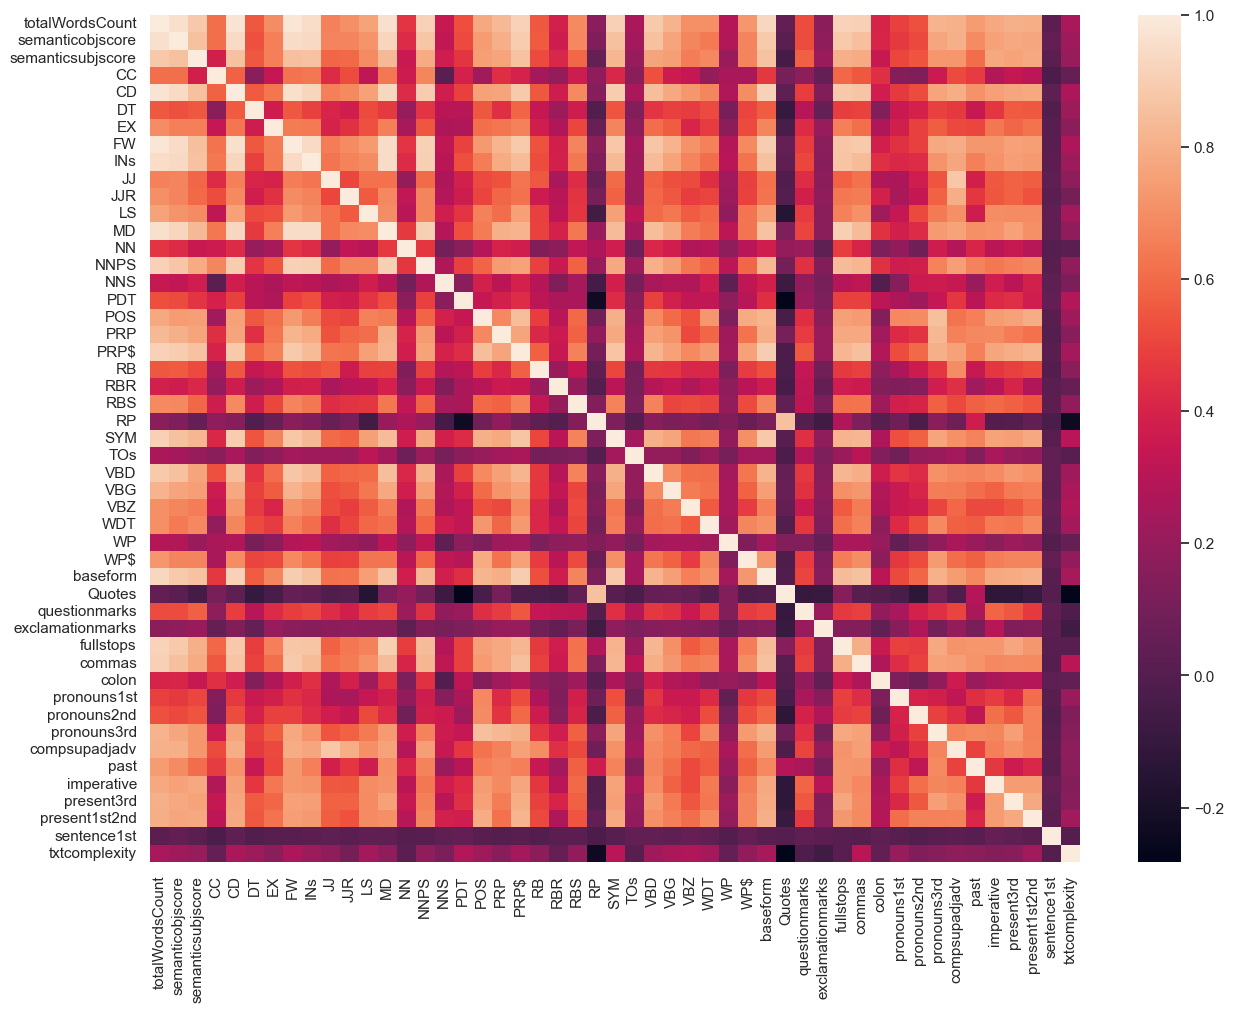

In [42]:
# see heatmap again 
correlation_matrix = ind_train.corr()

sb.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.show()

In [43]:
plt.rcParams['figure.figsize'] = (15,11)

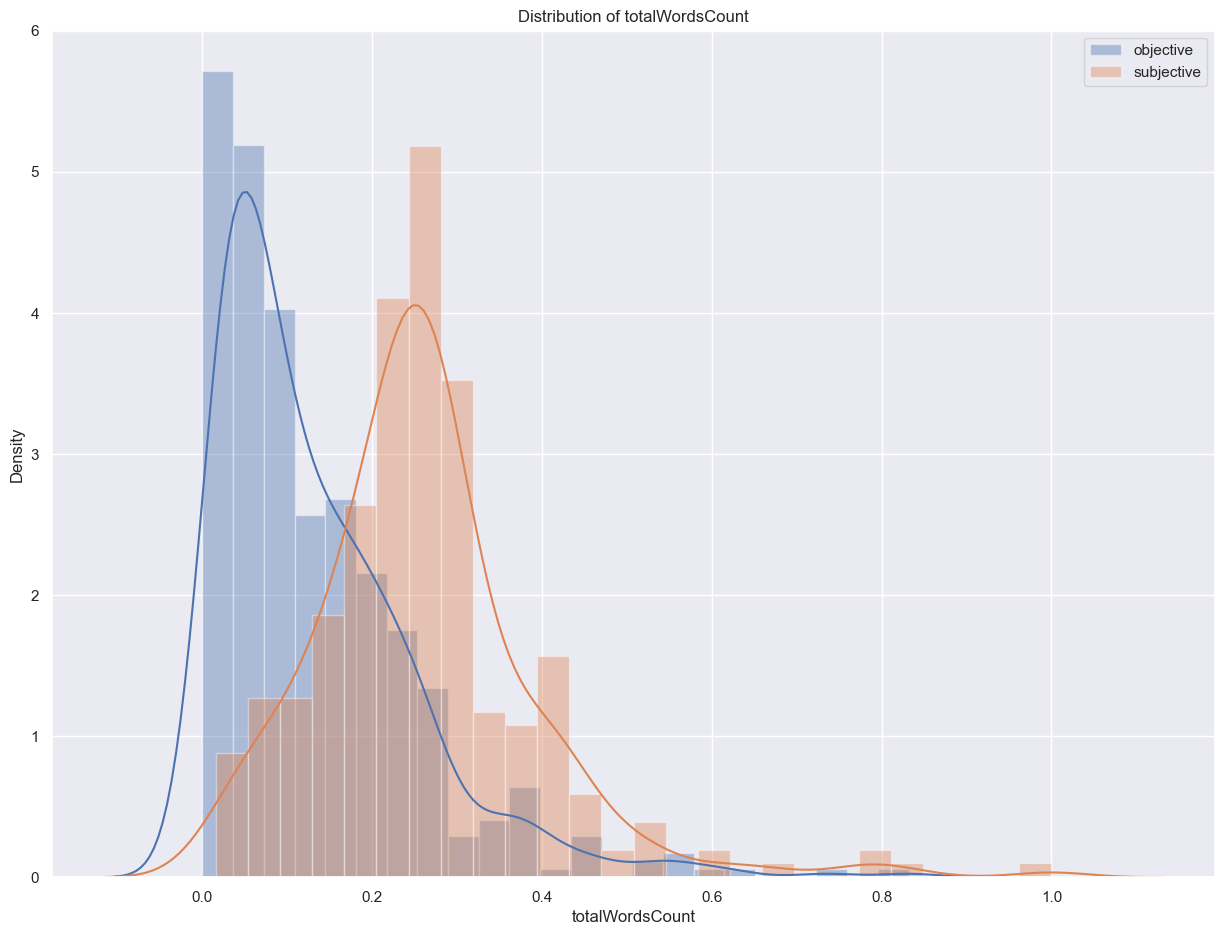

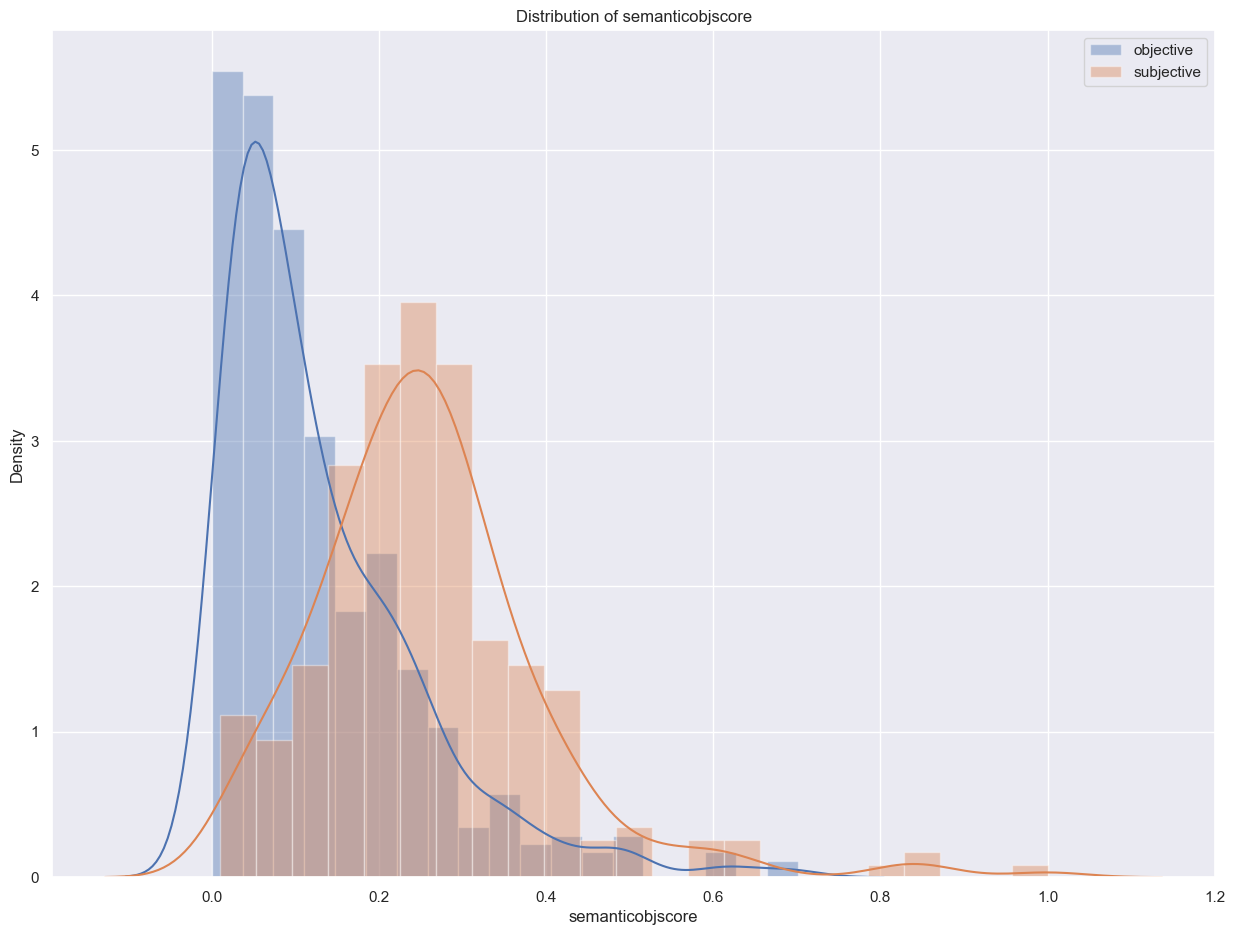

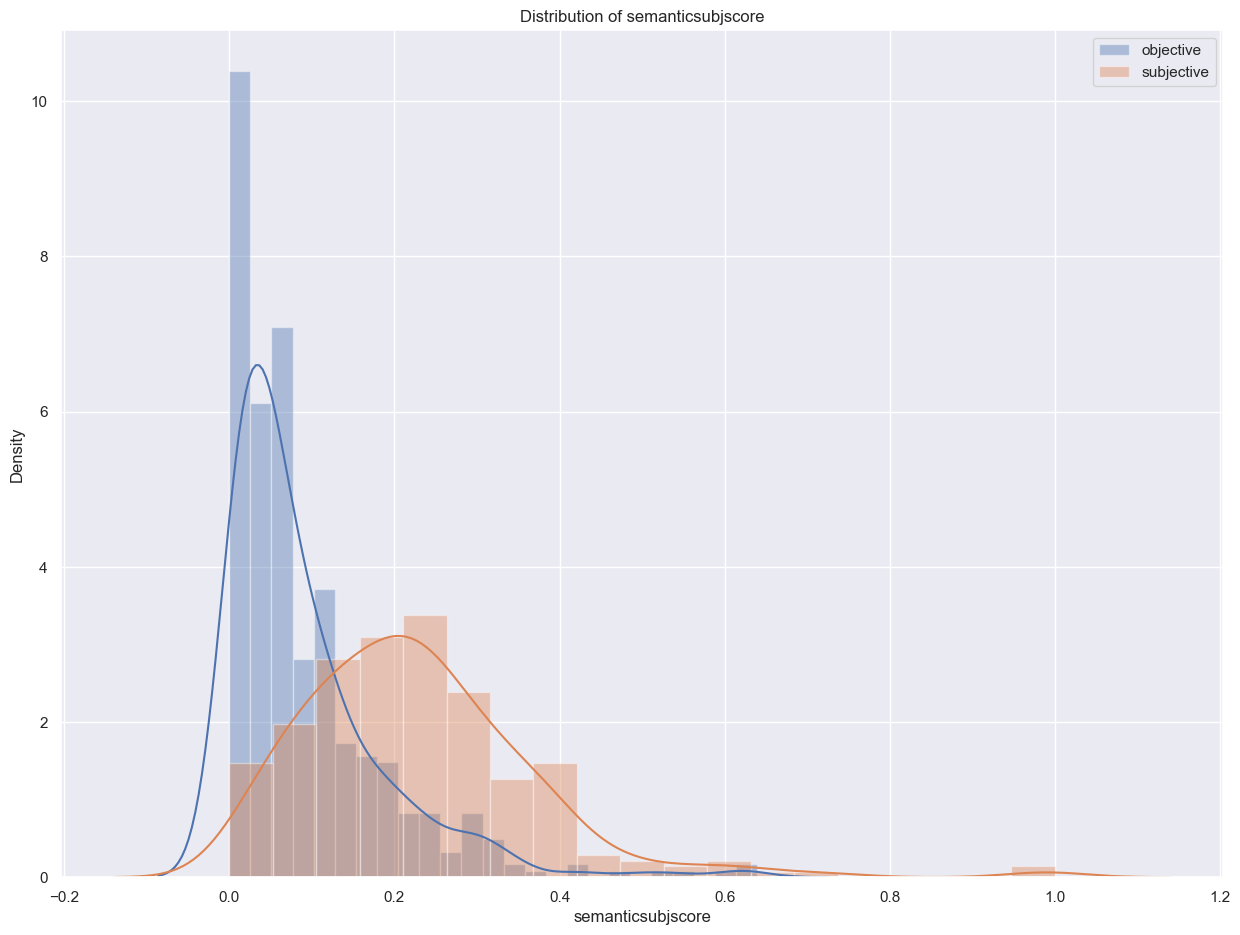

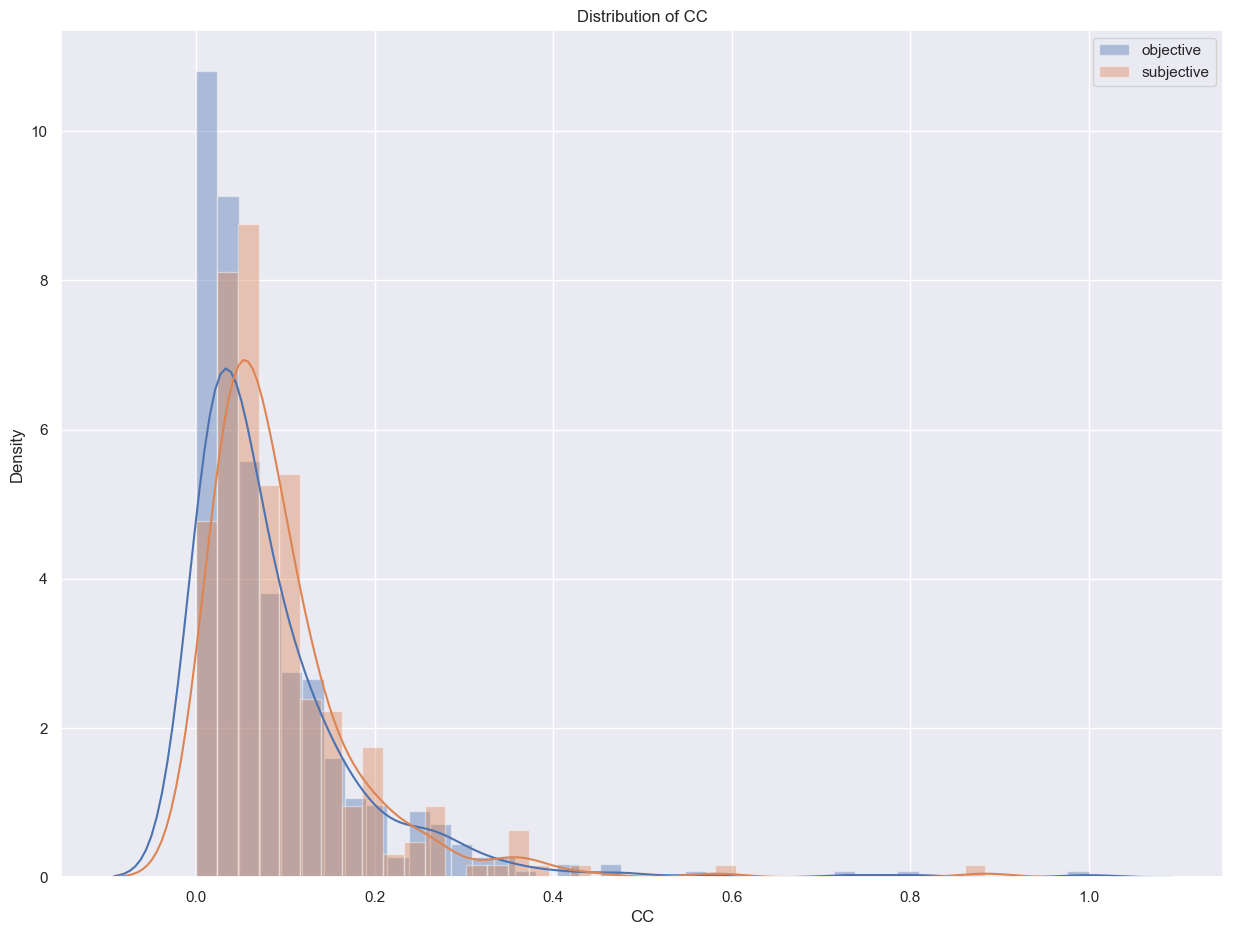

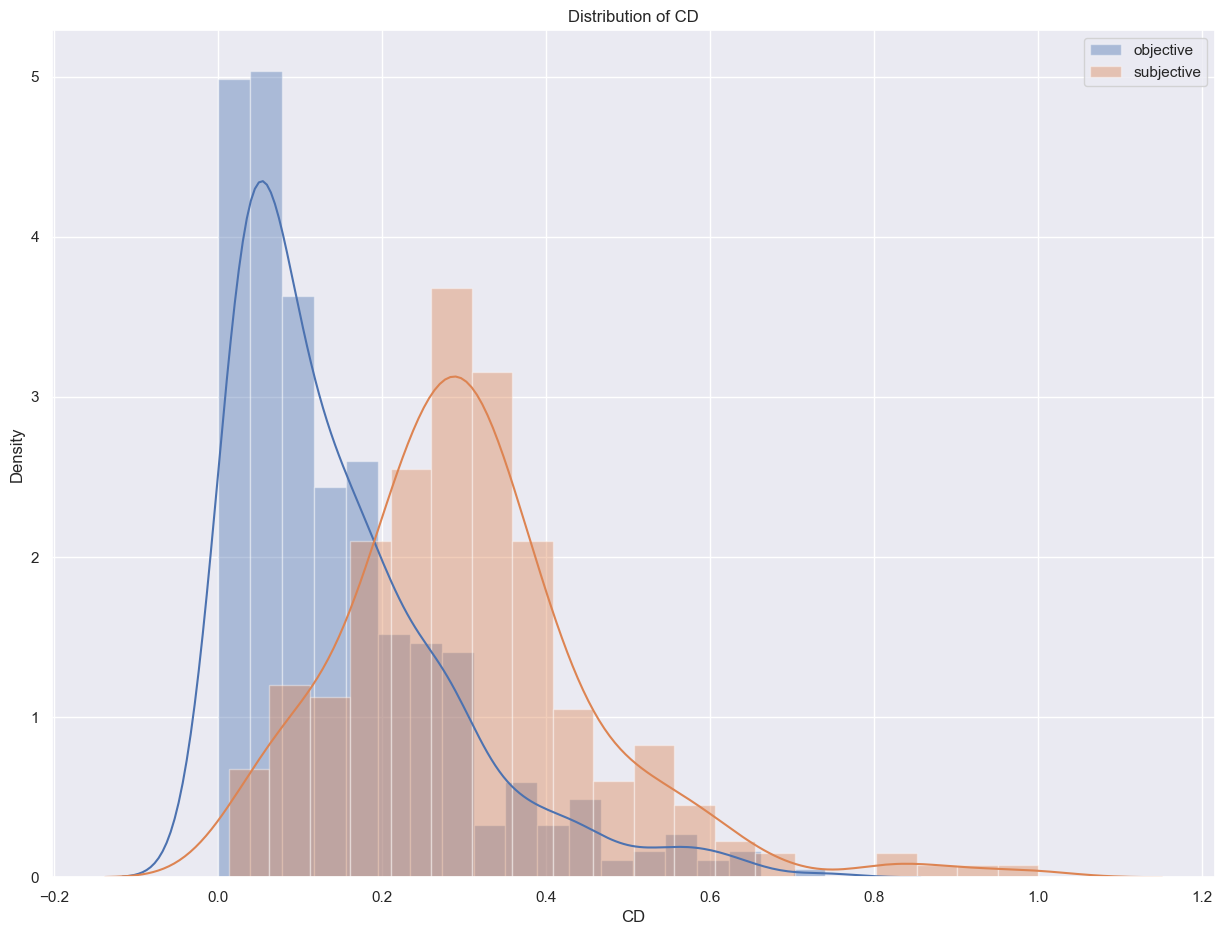

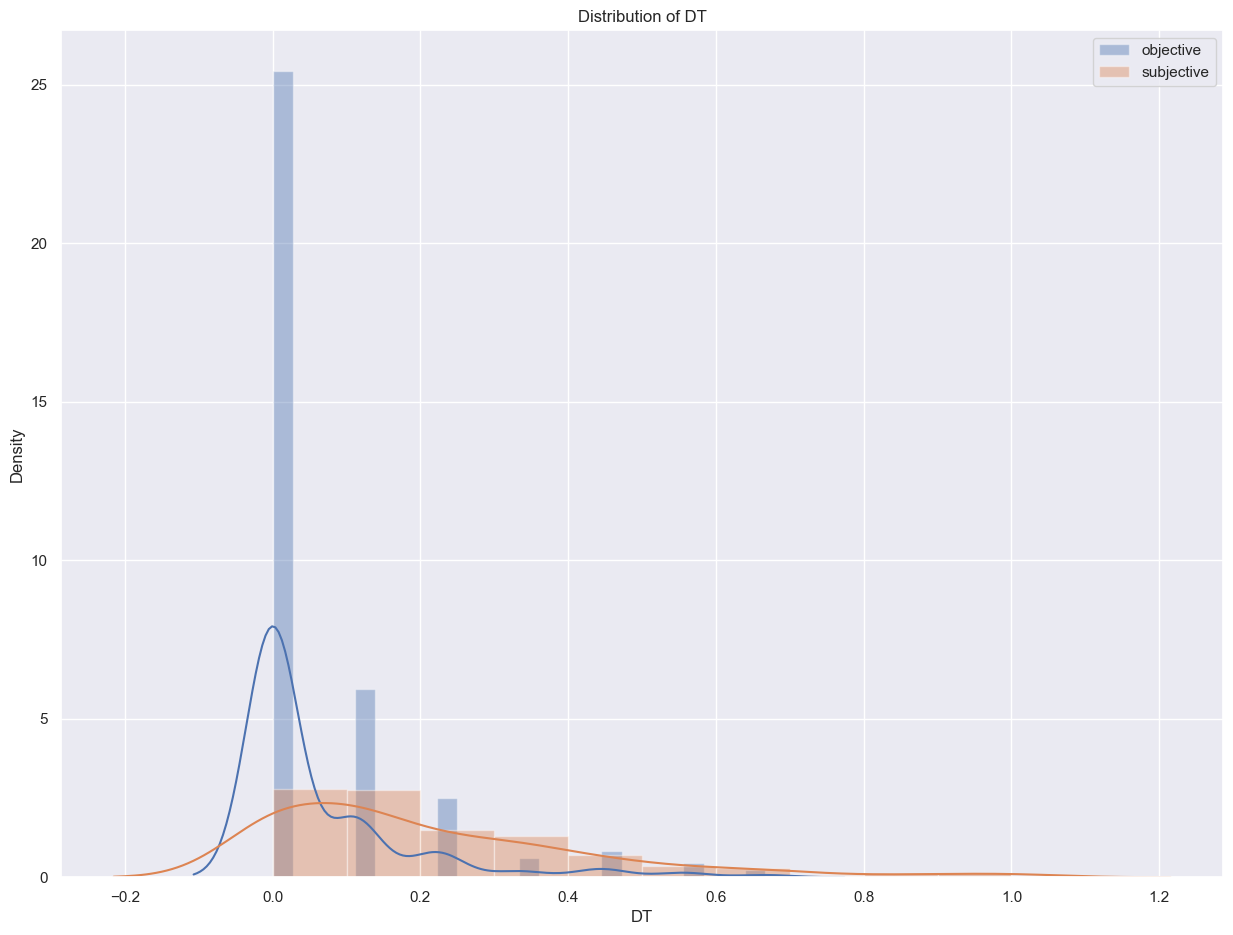

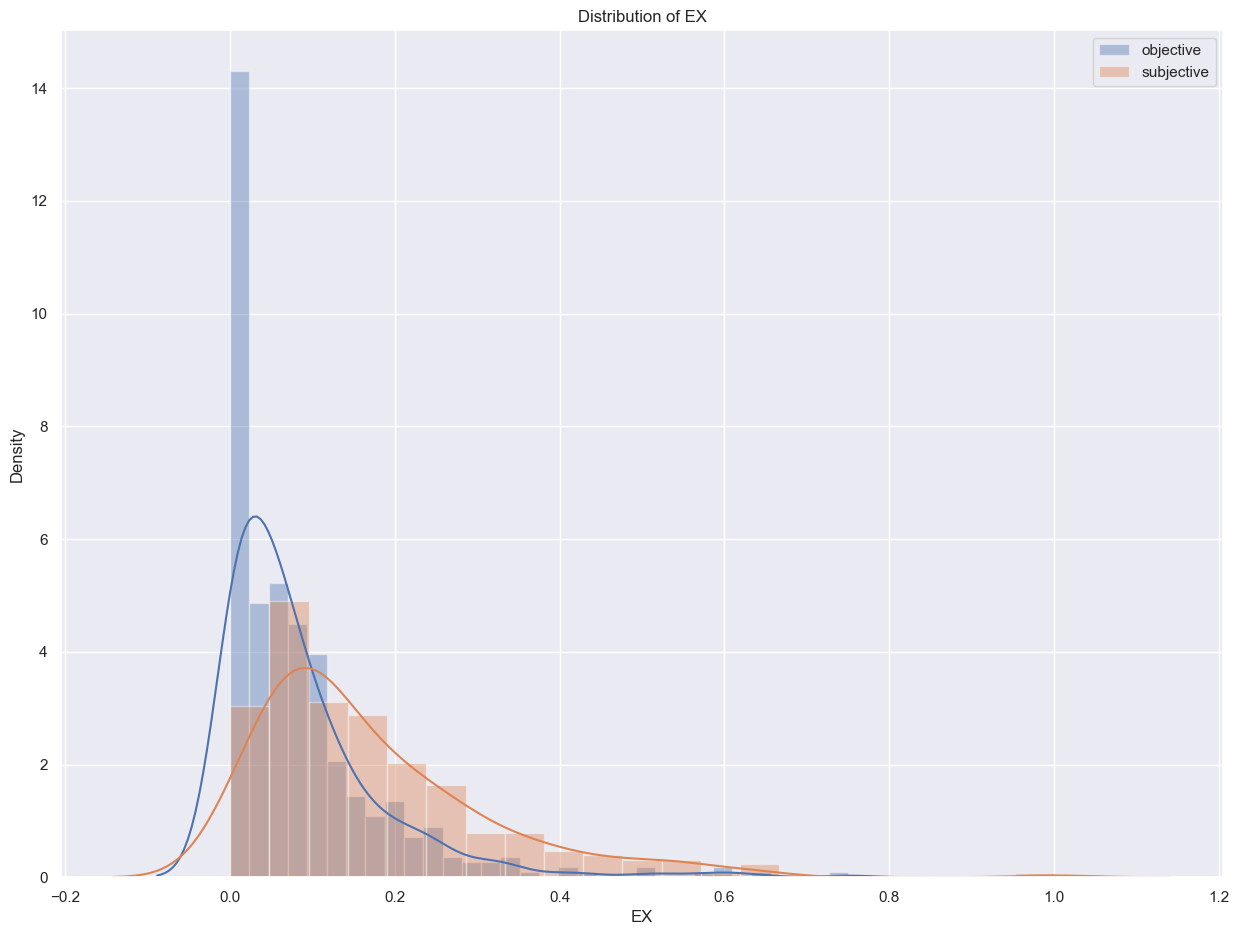

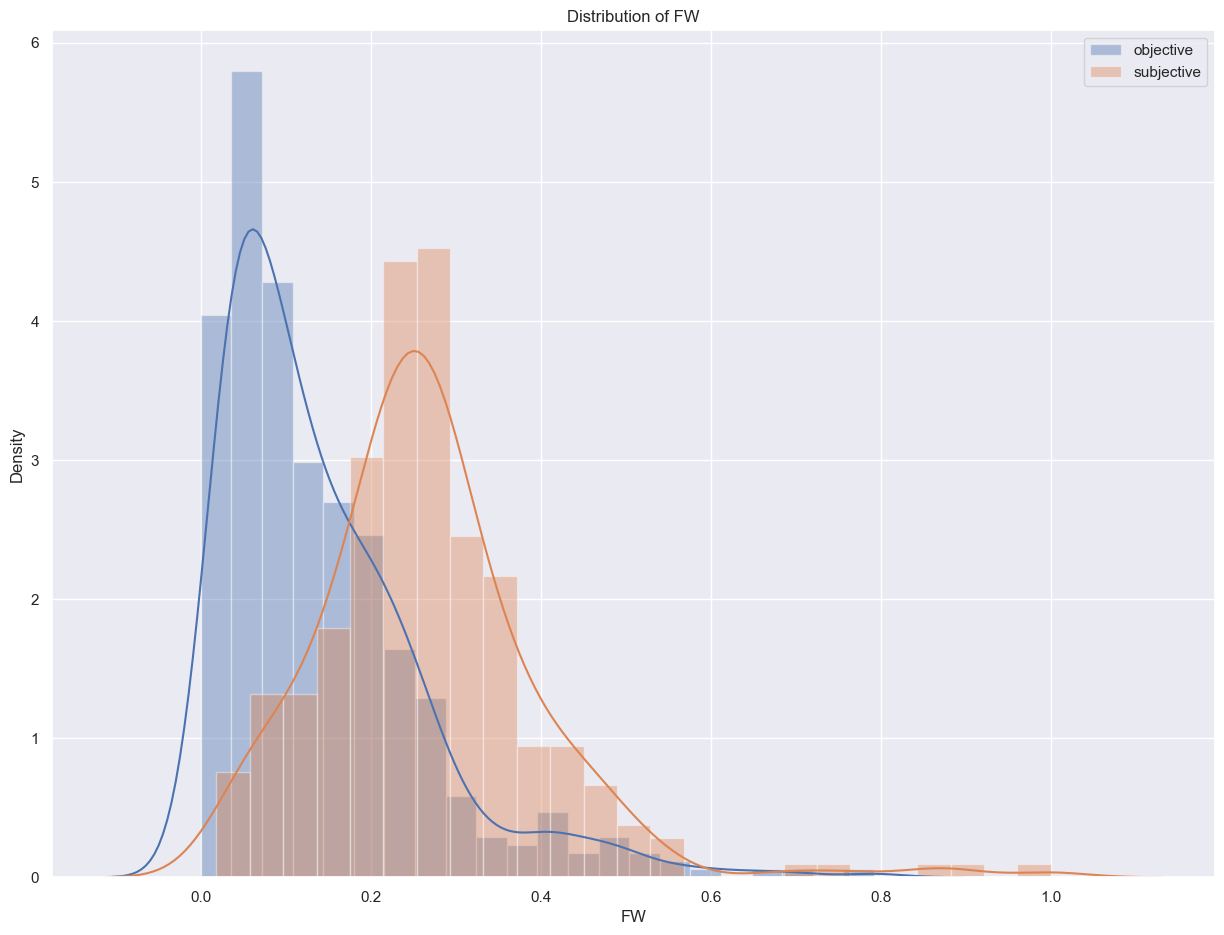

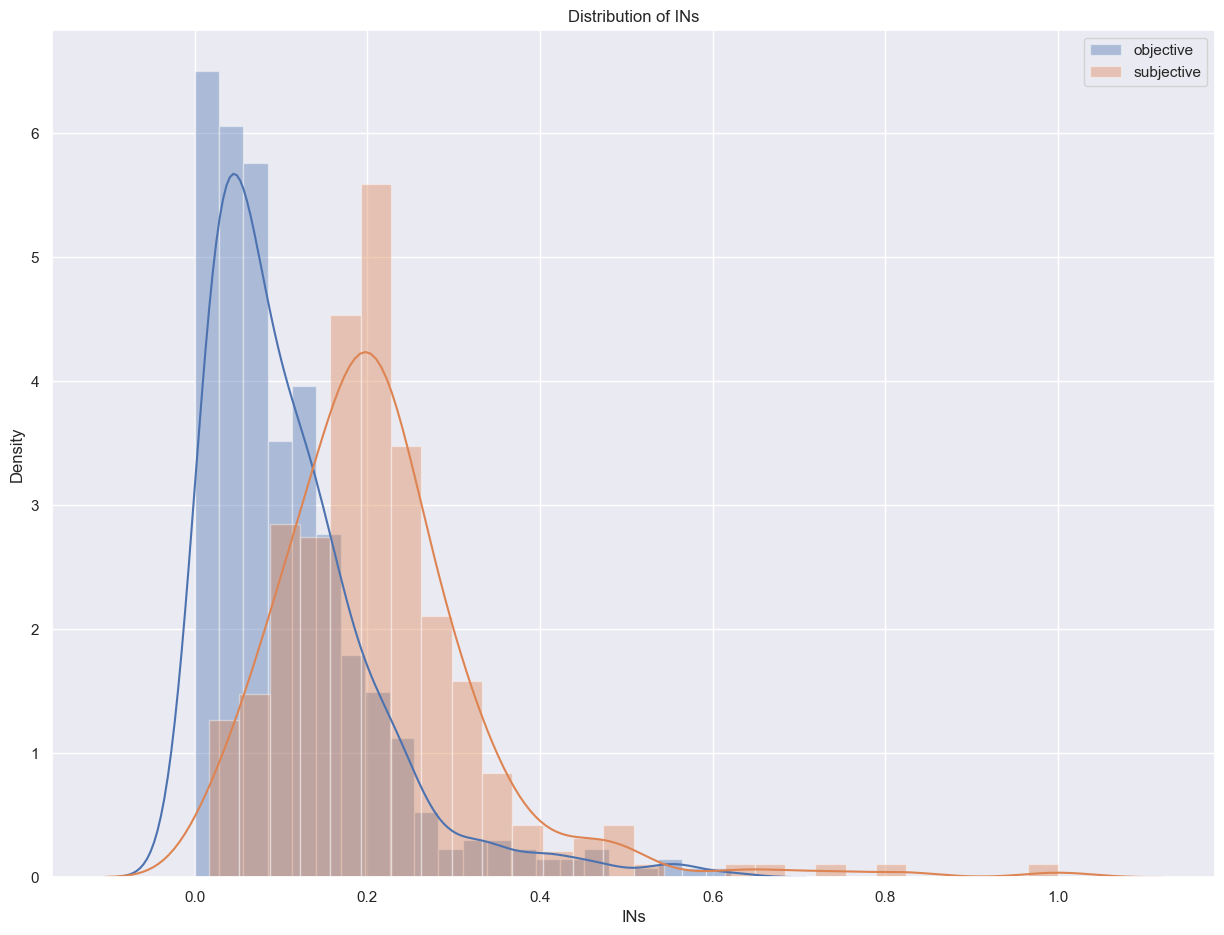

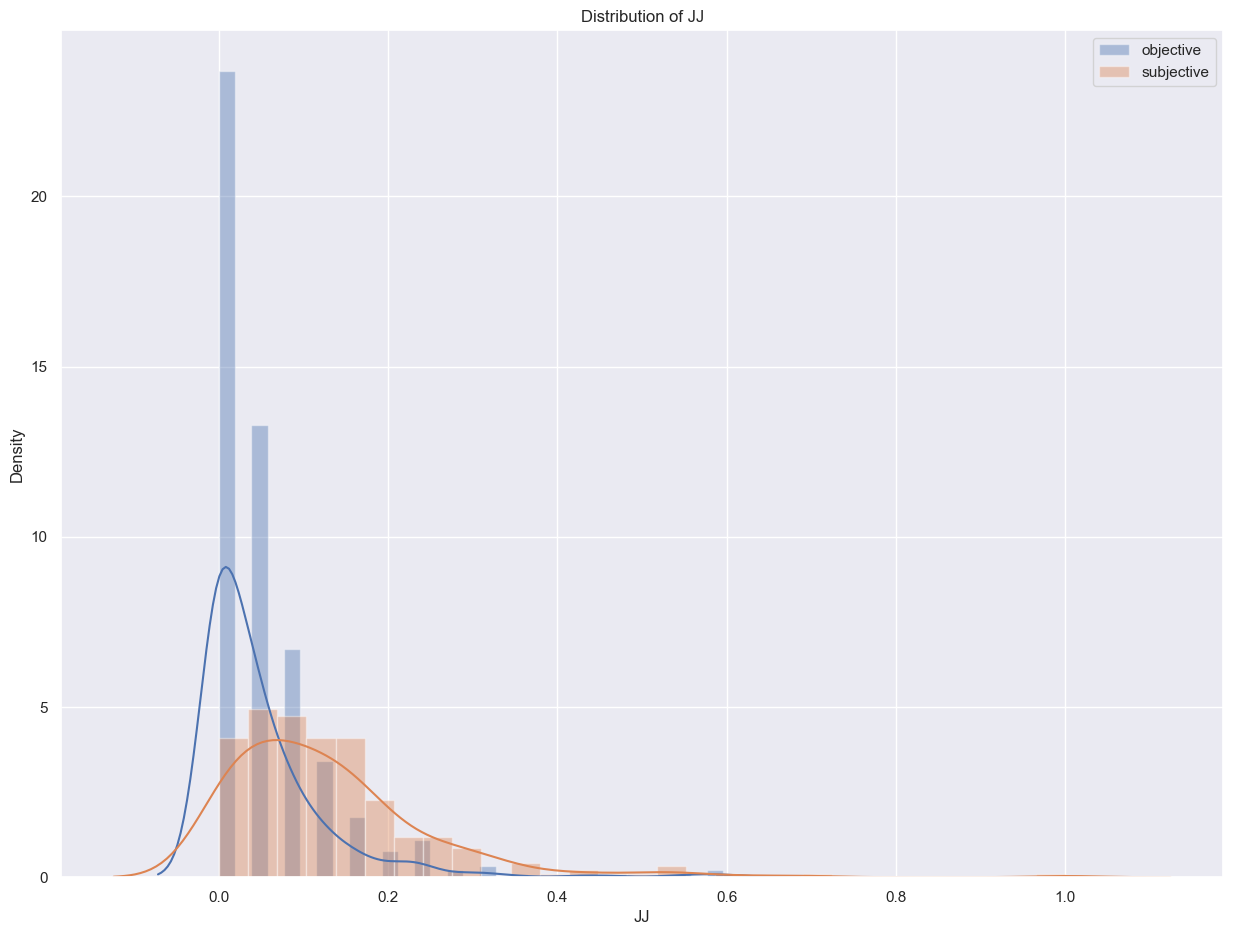

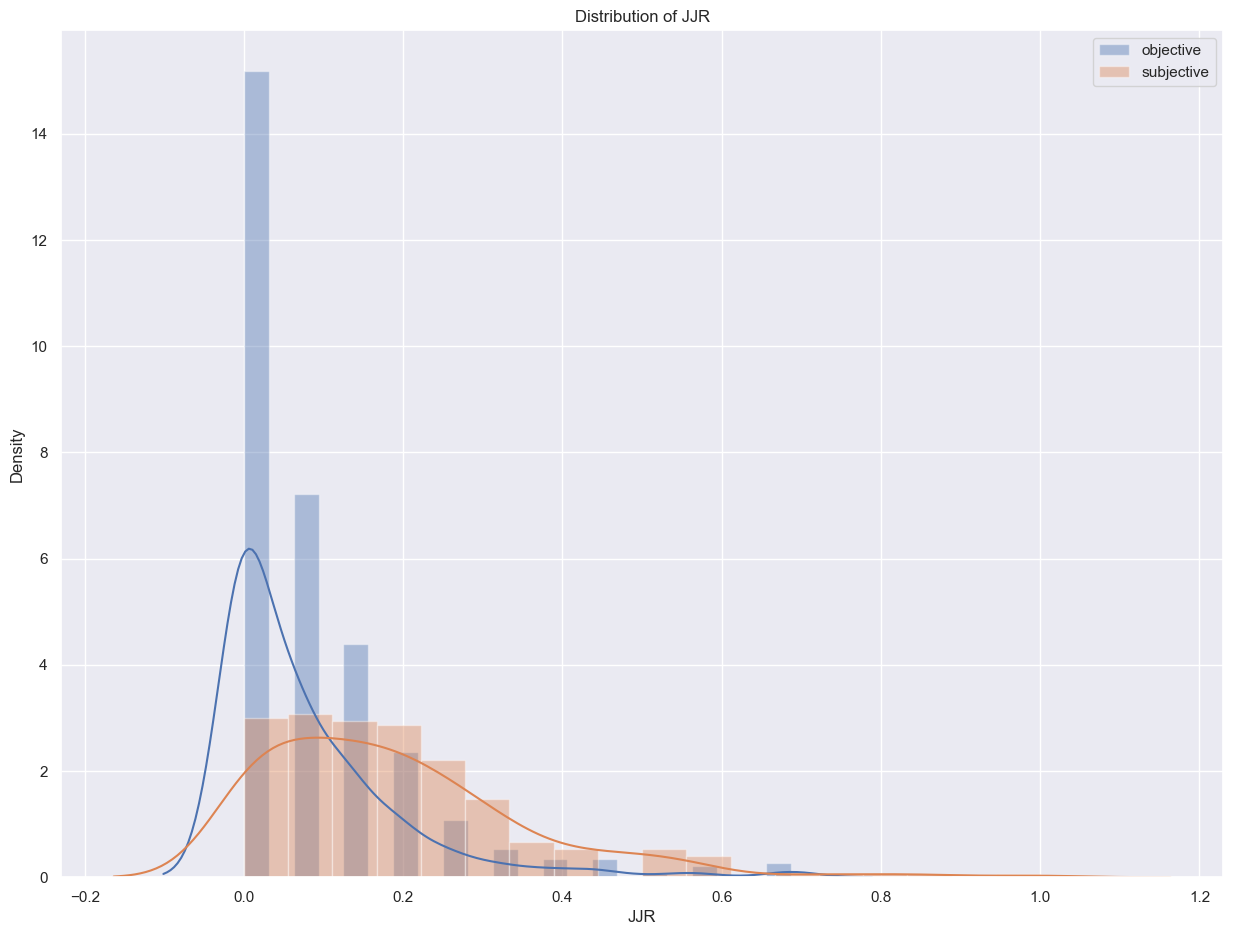

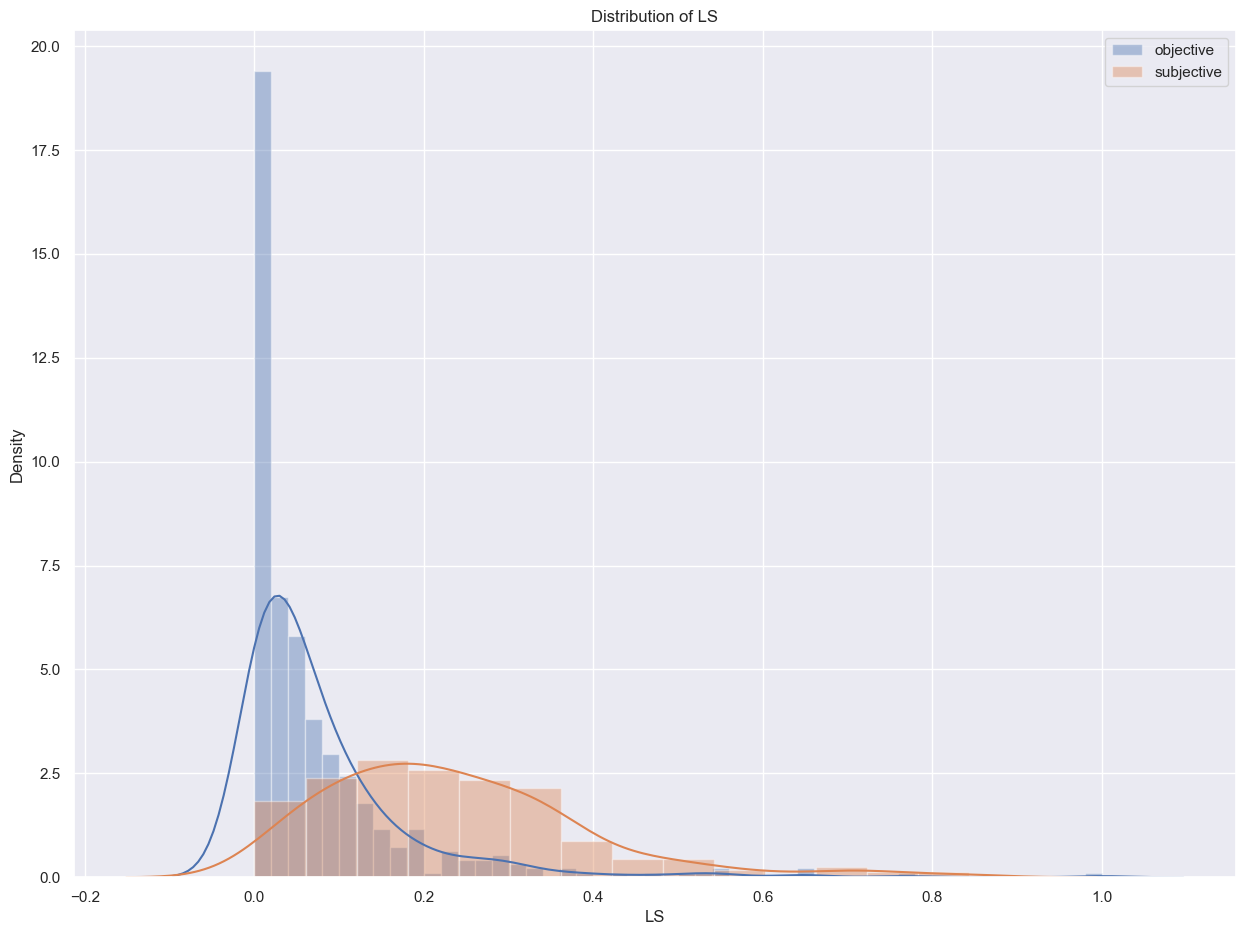

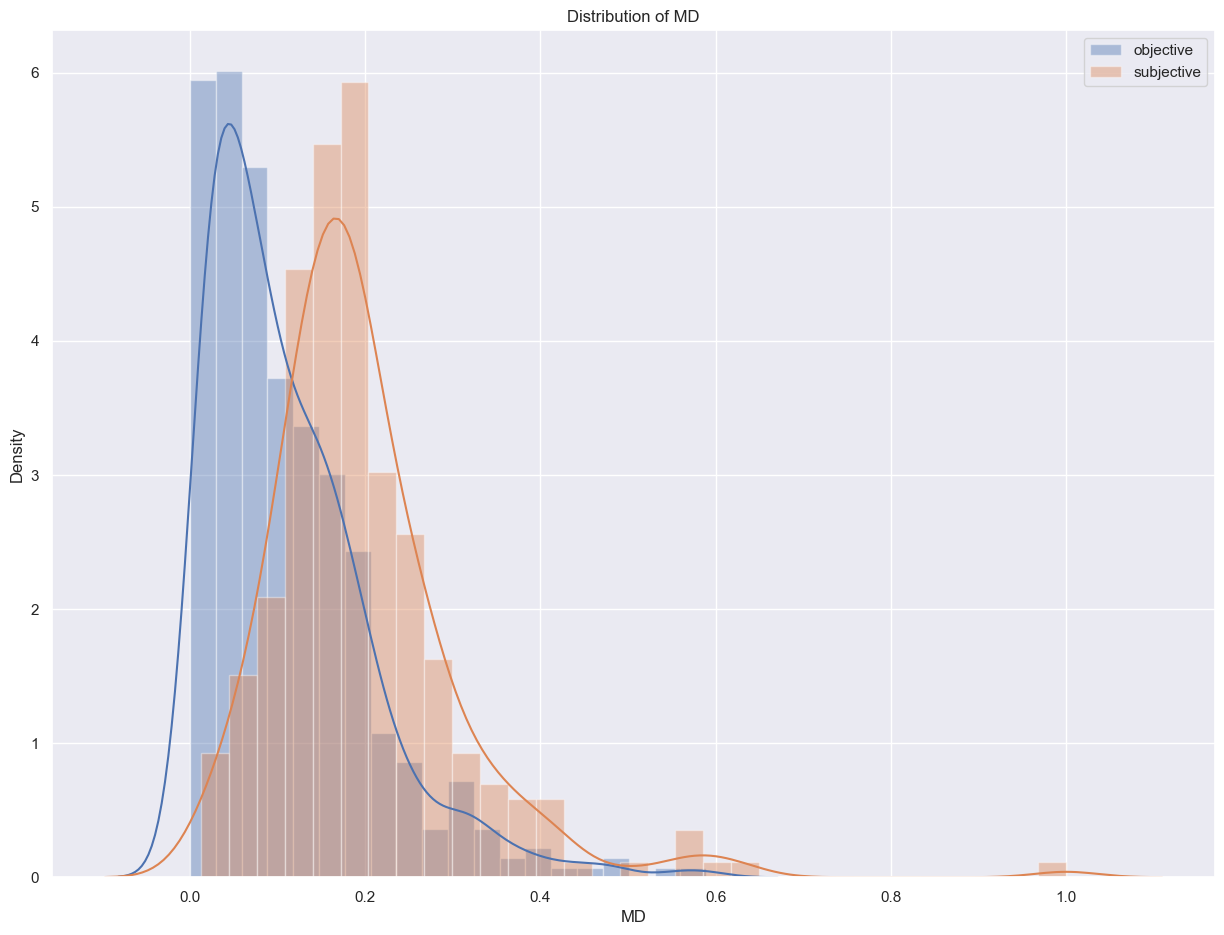

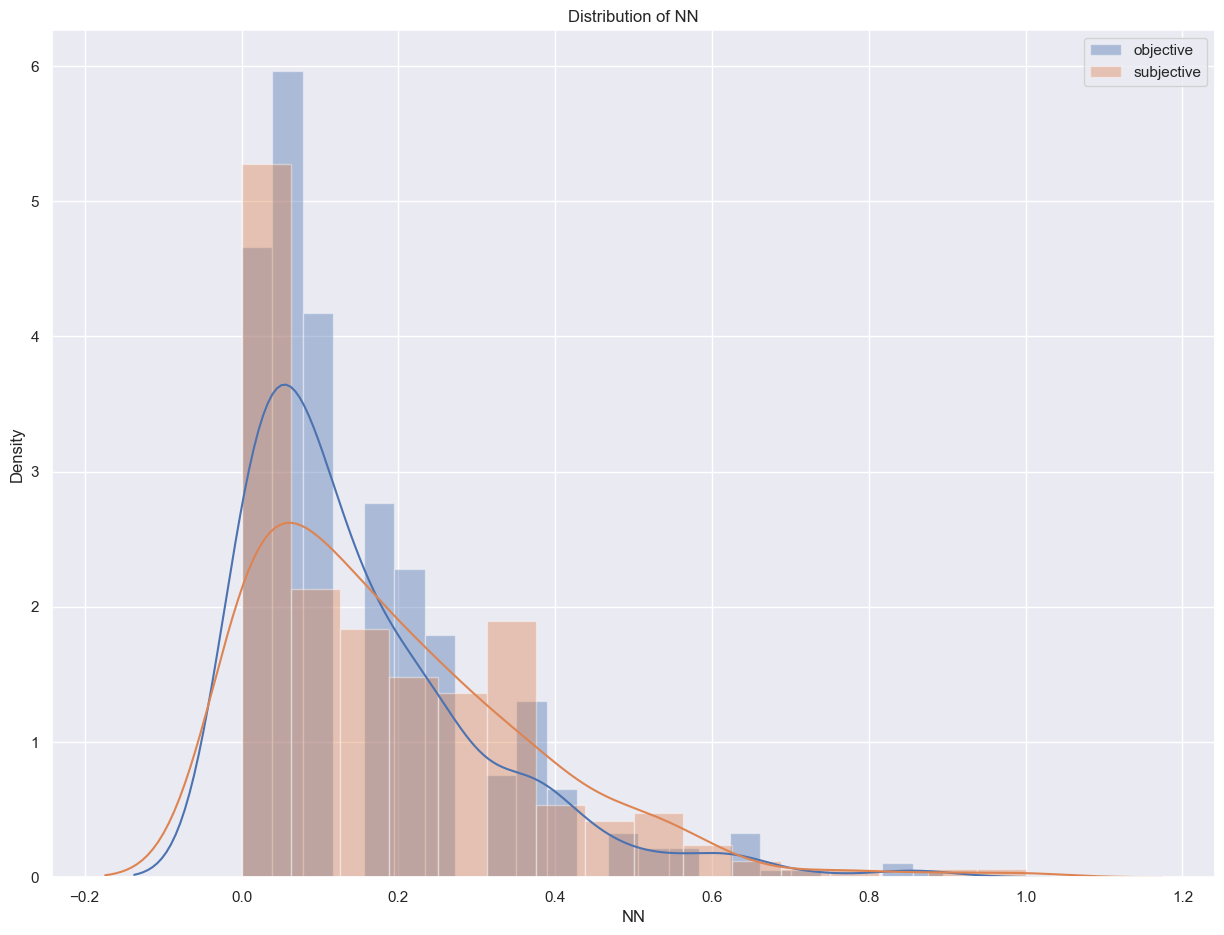

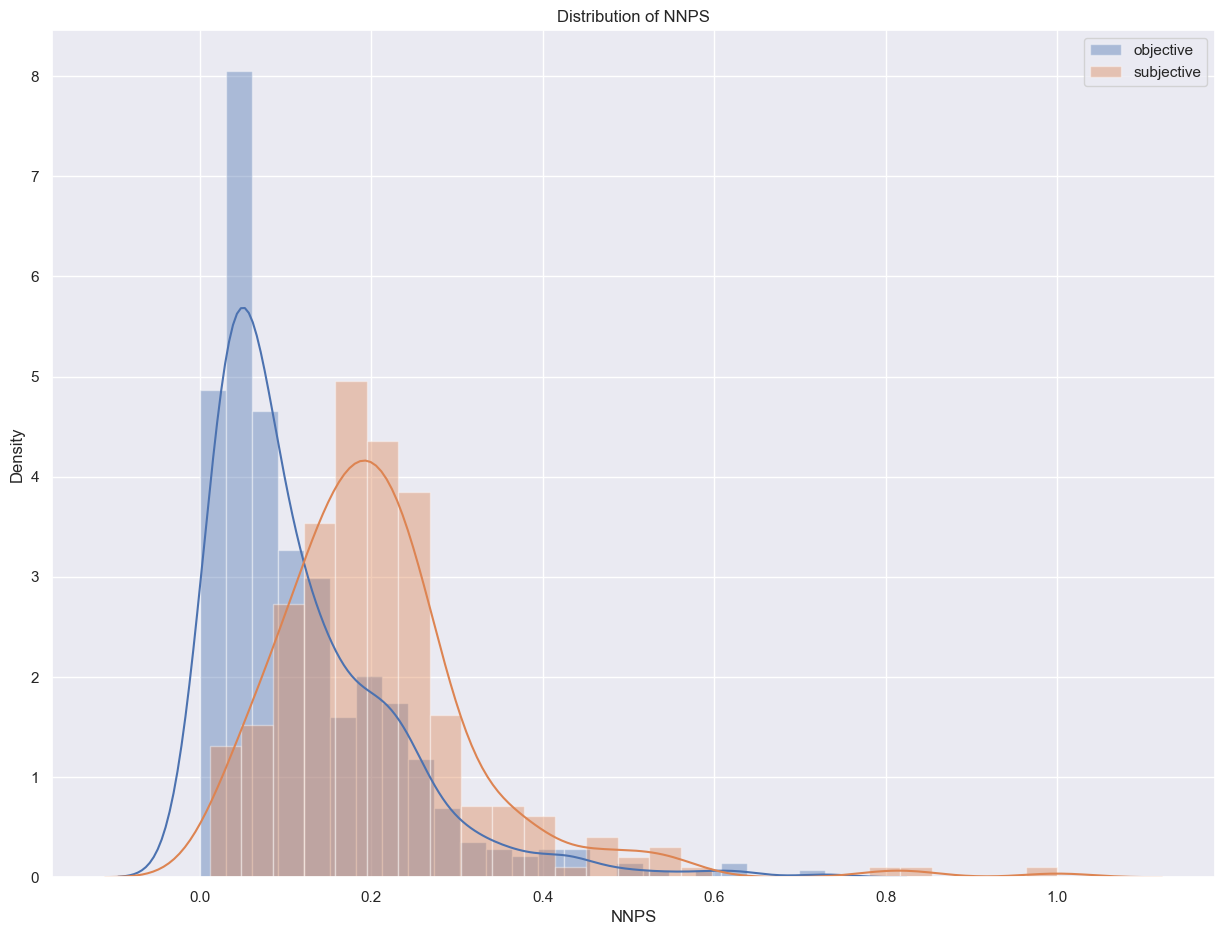

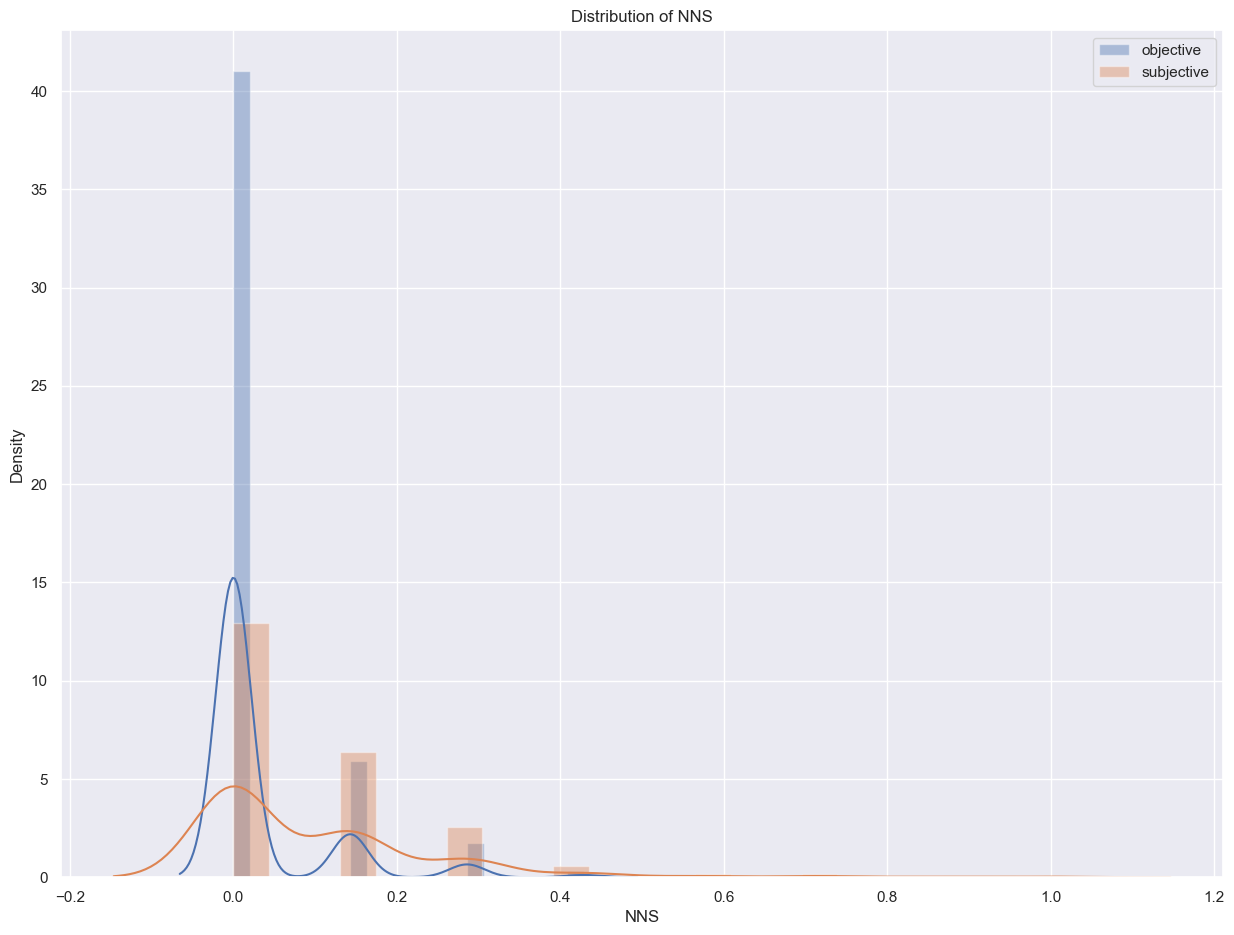

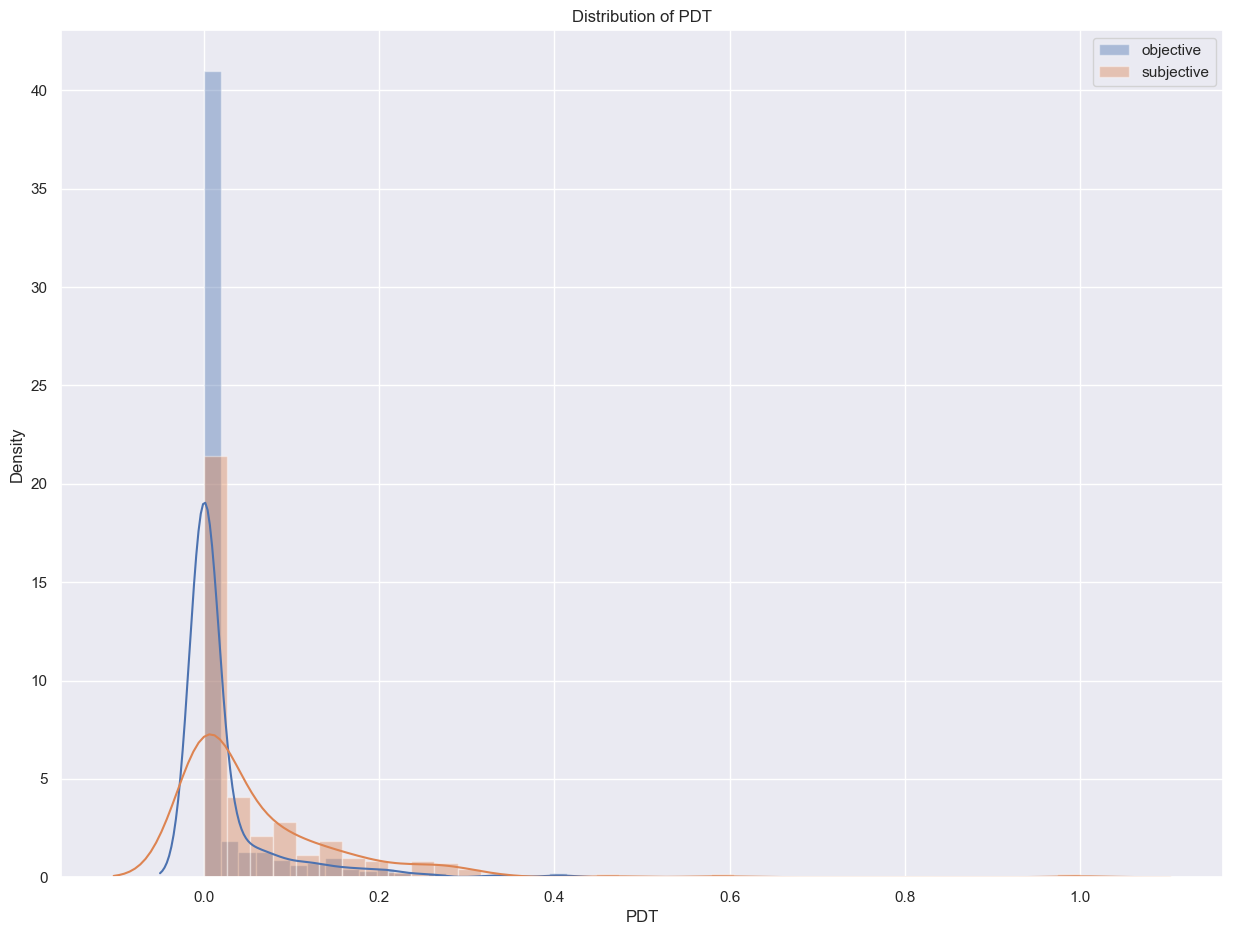

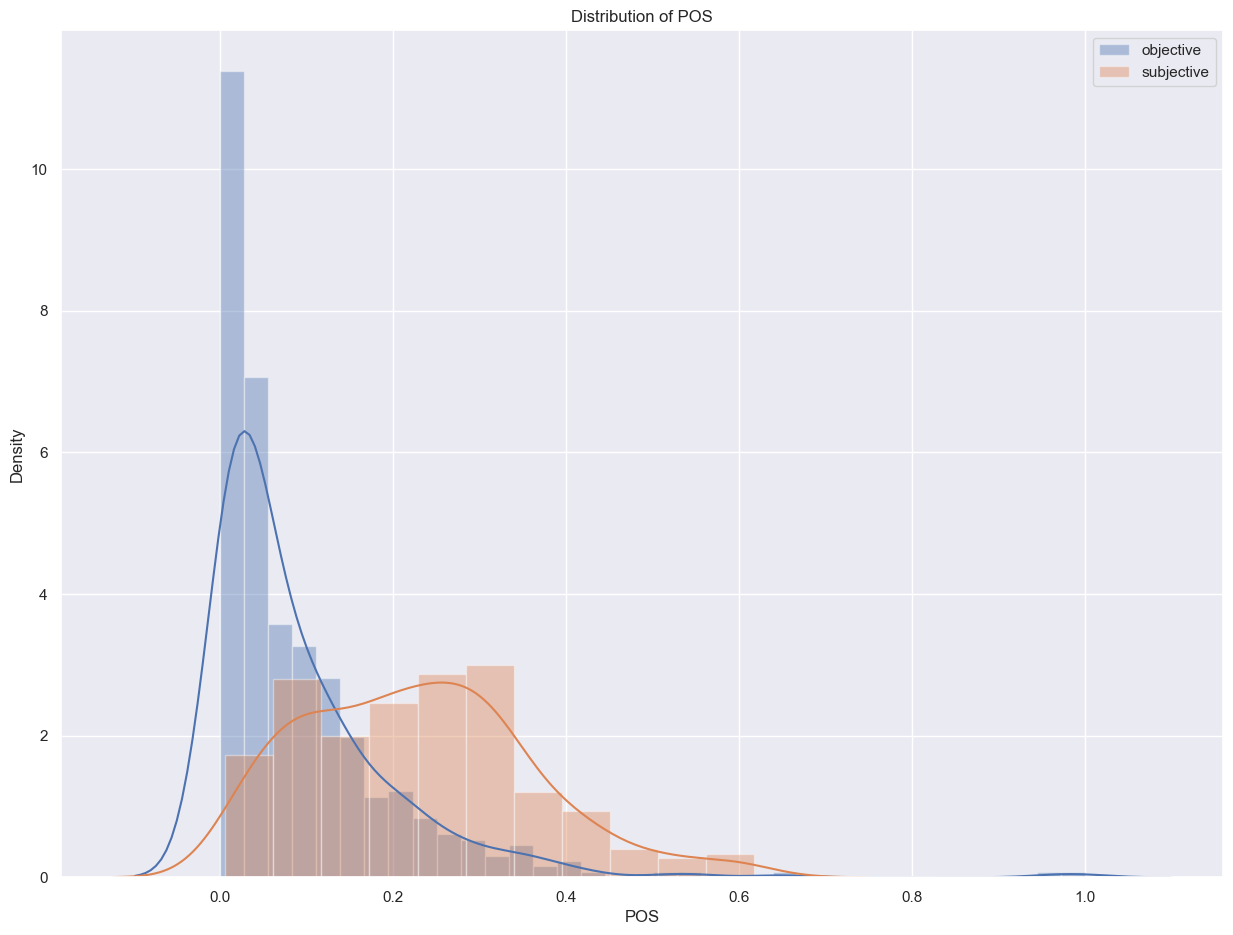

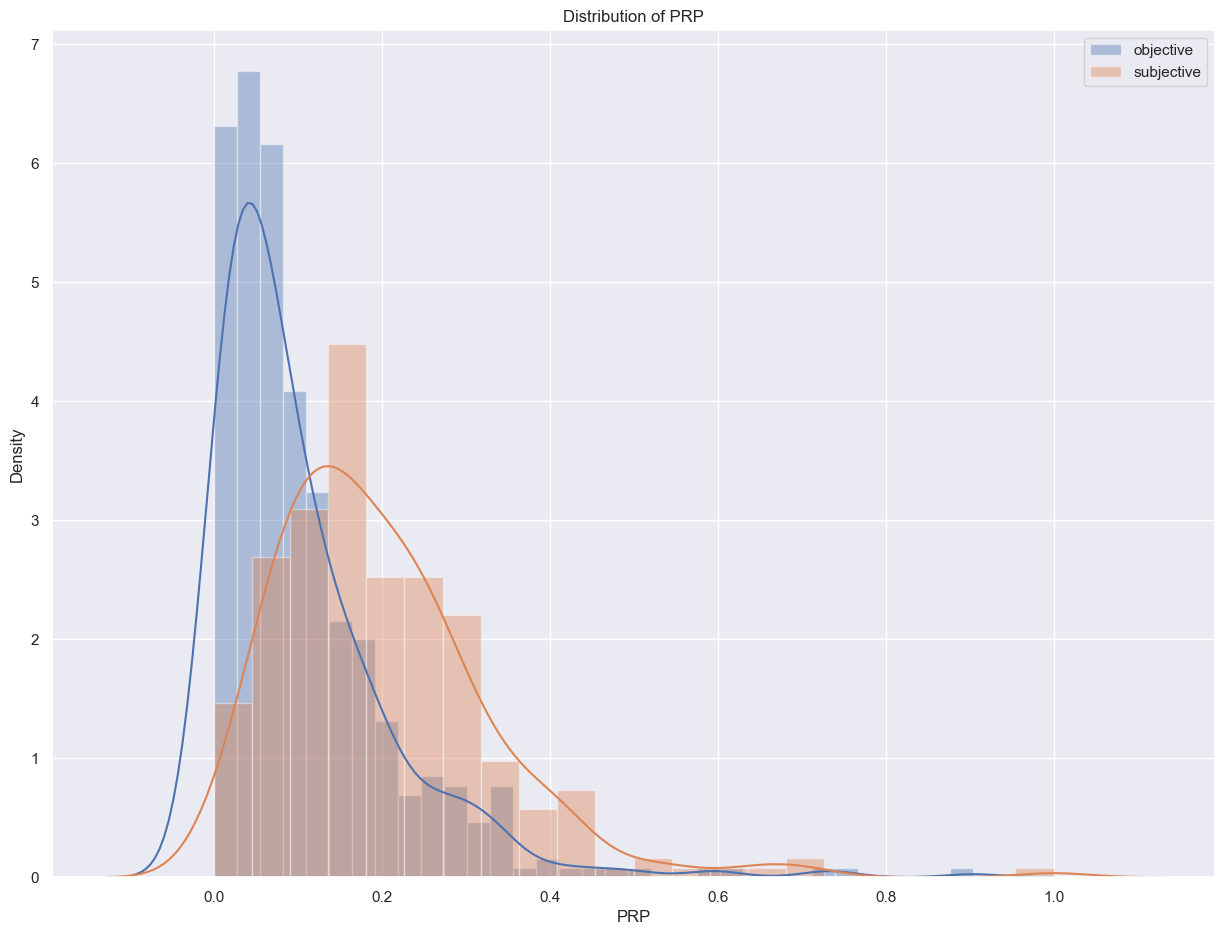

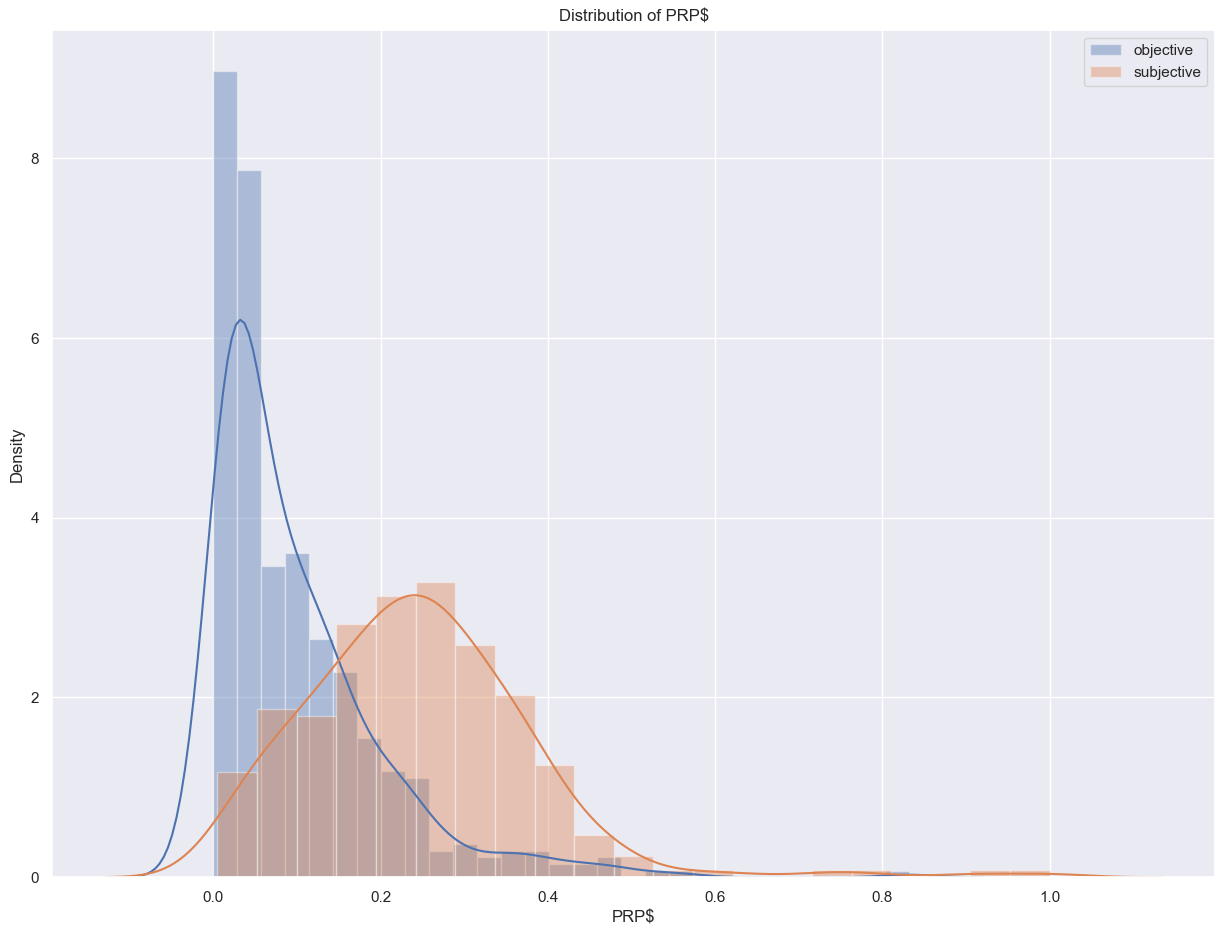

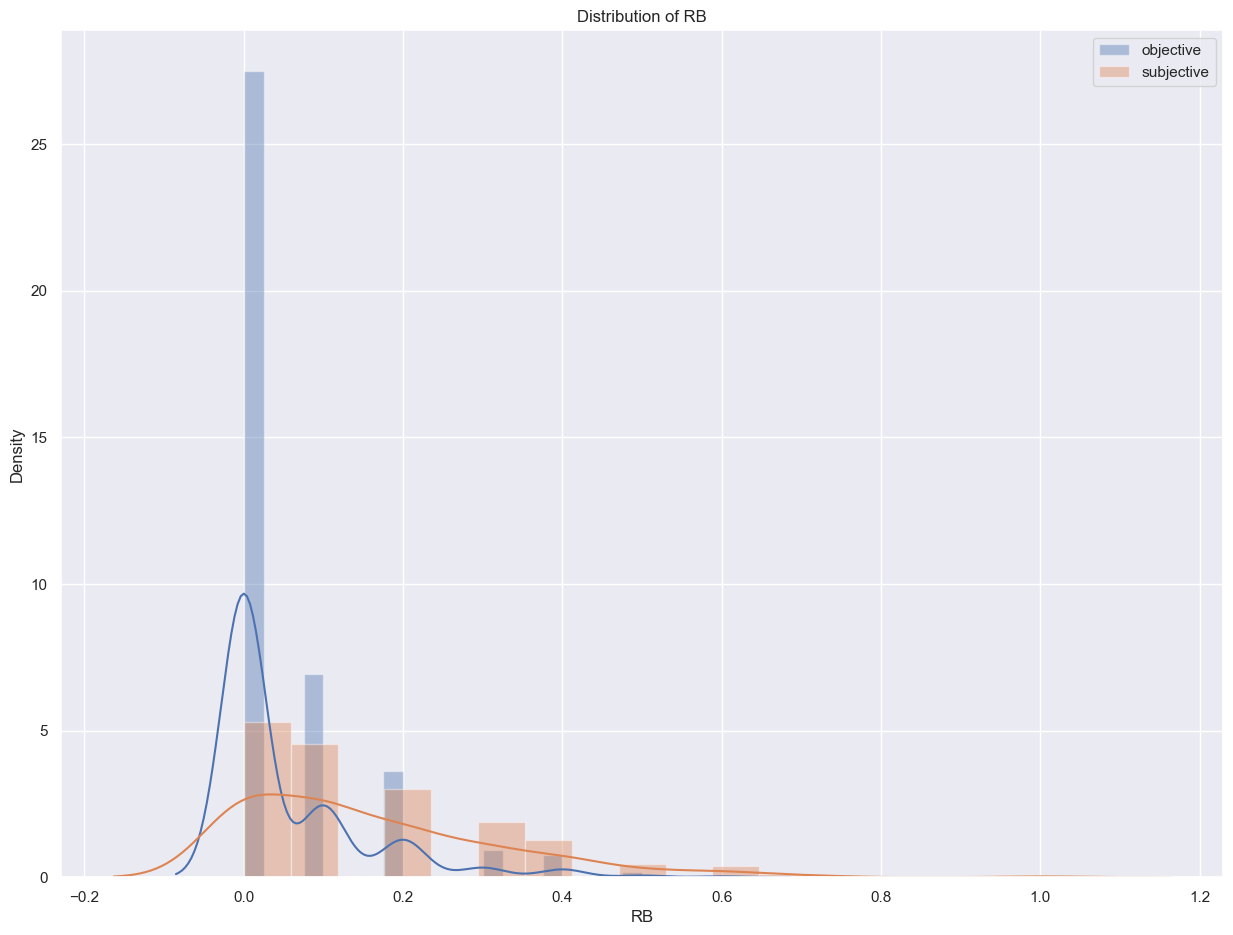

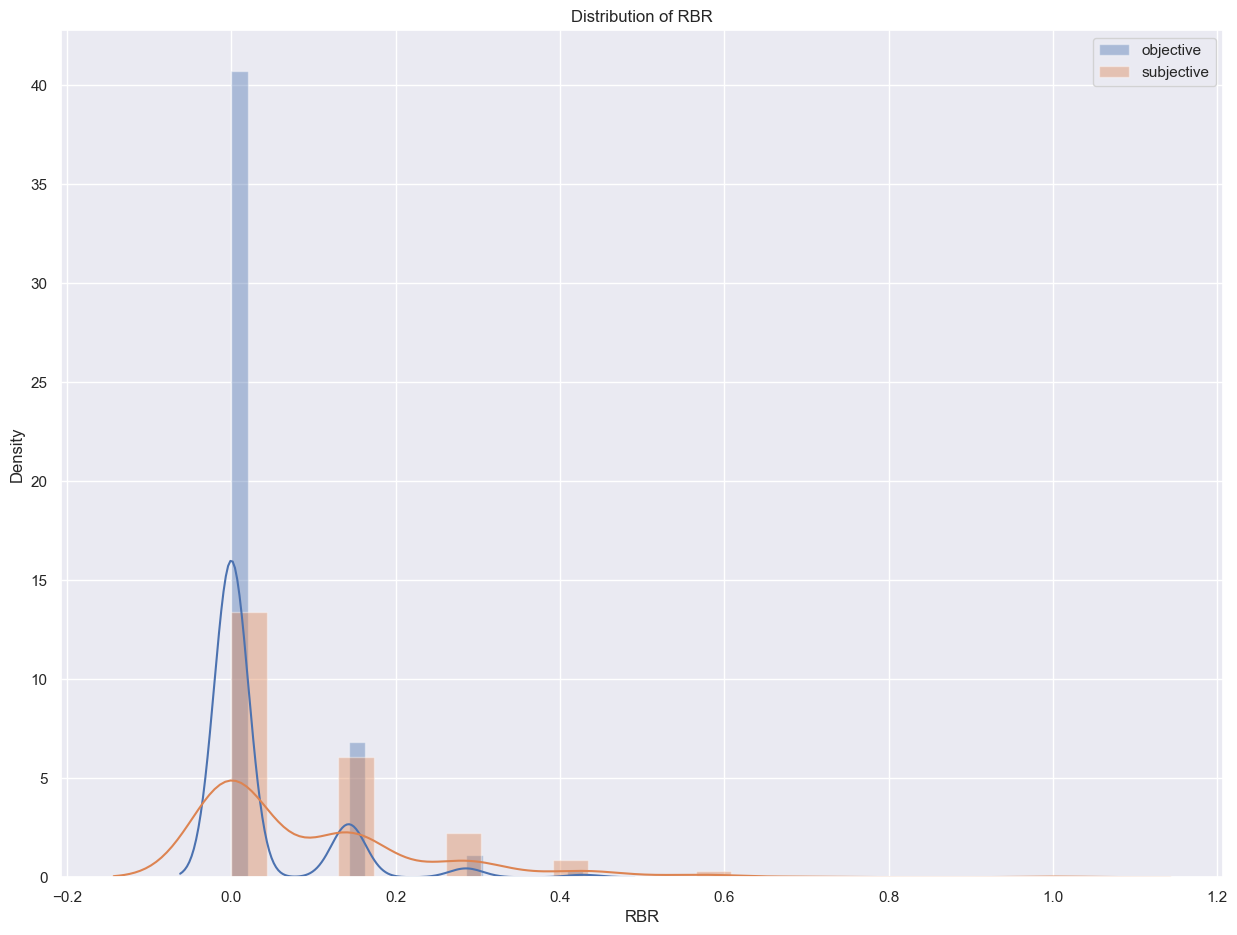

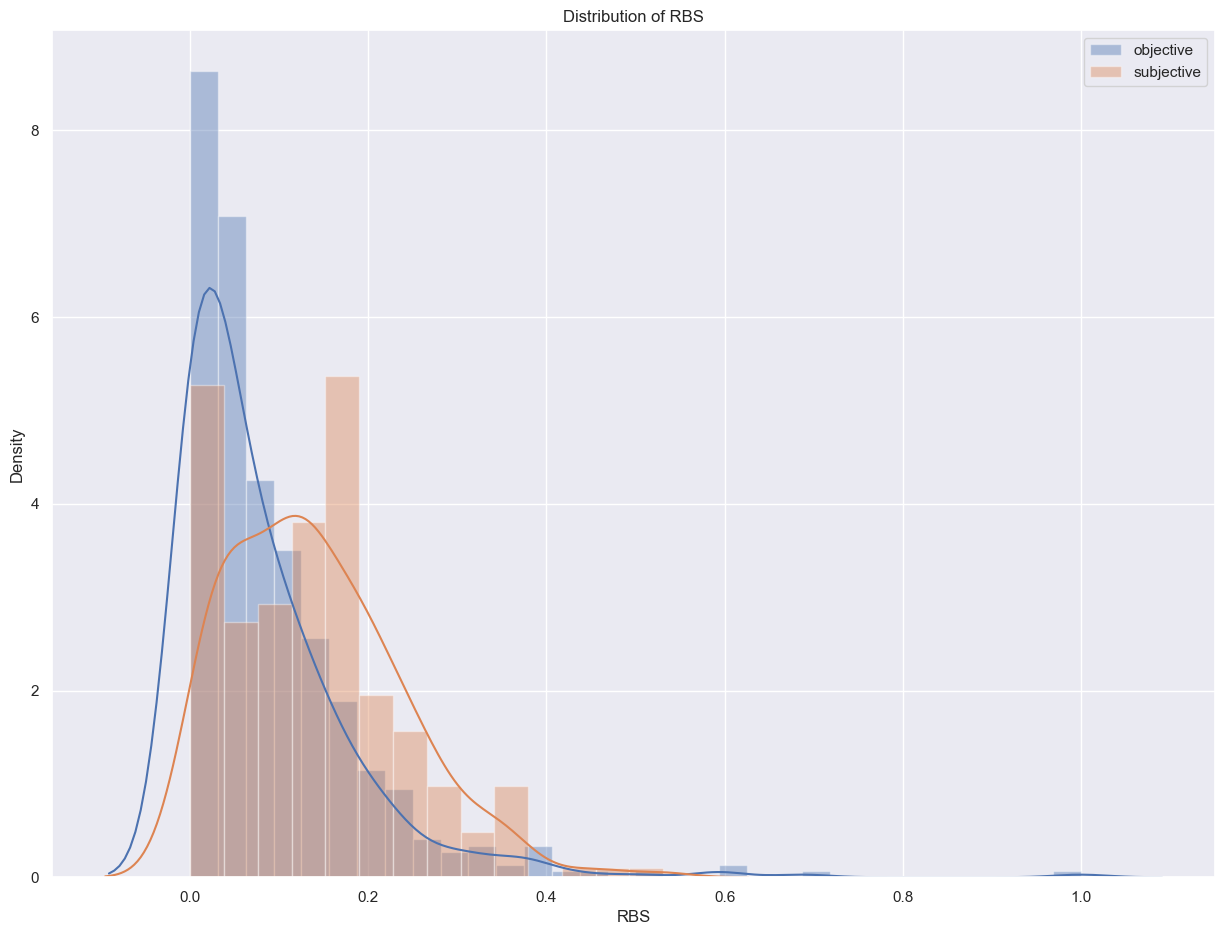

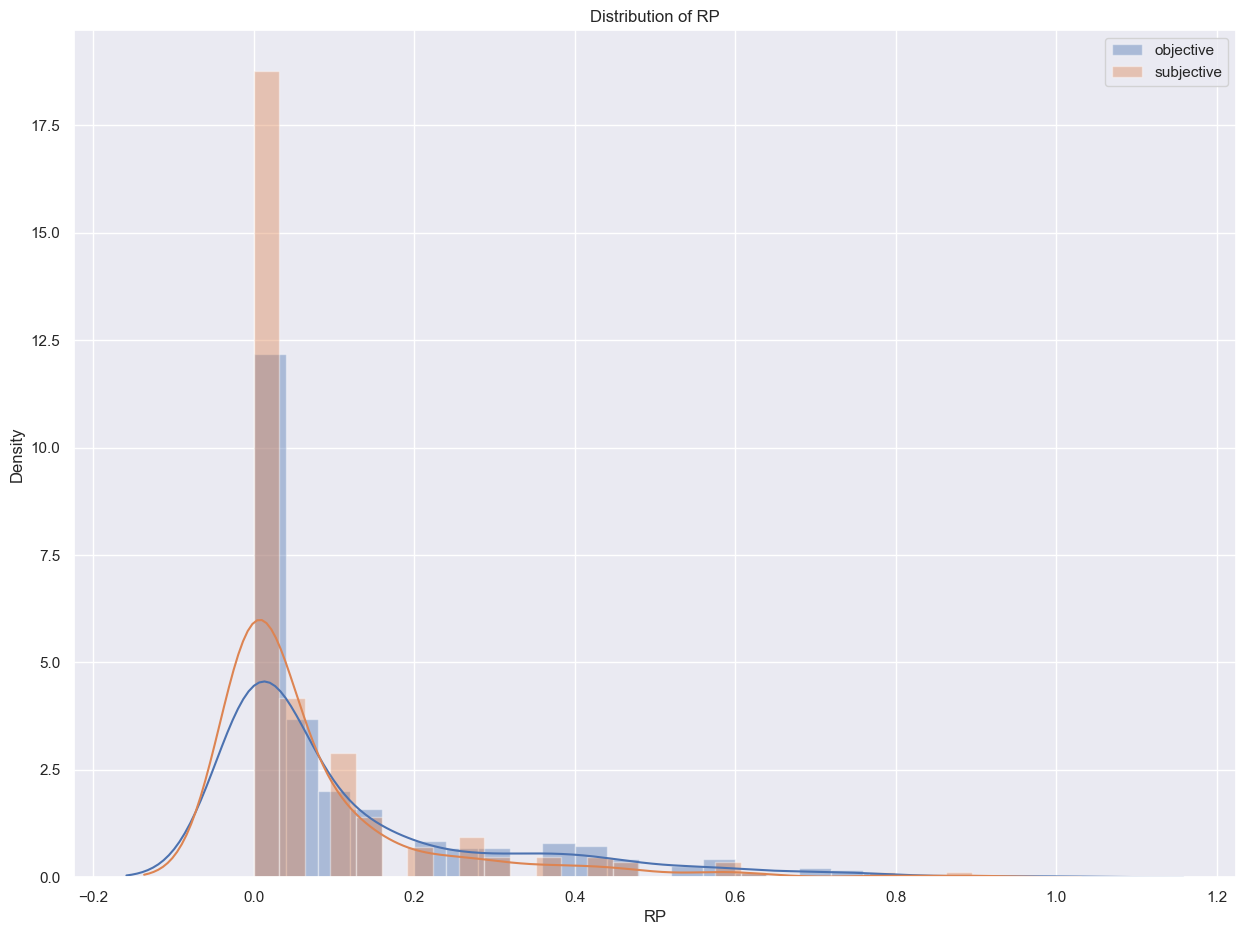

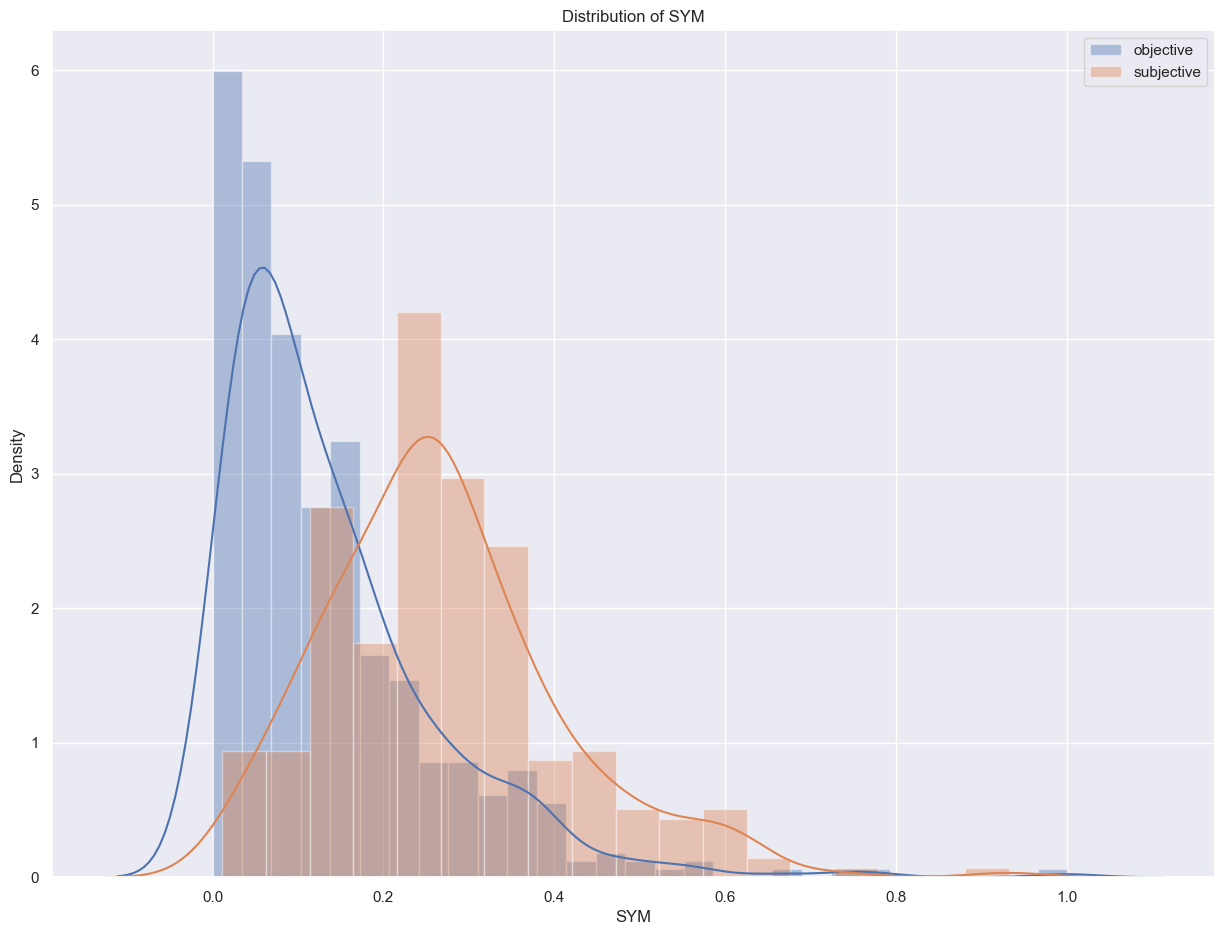

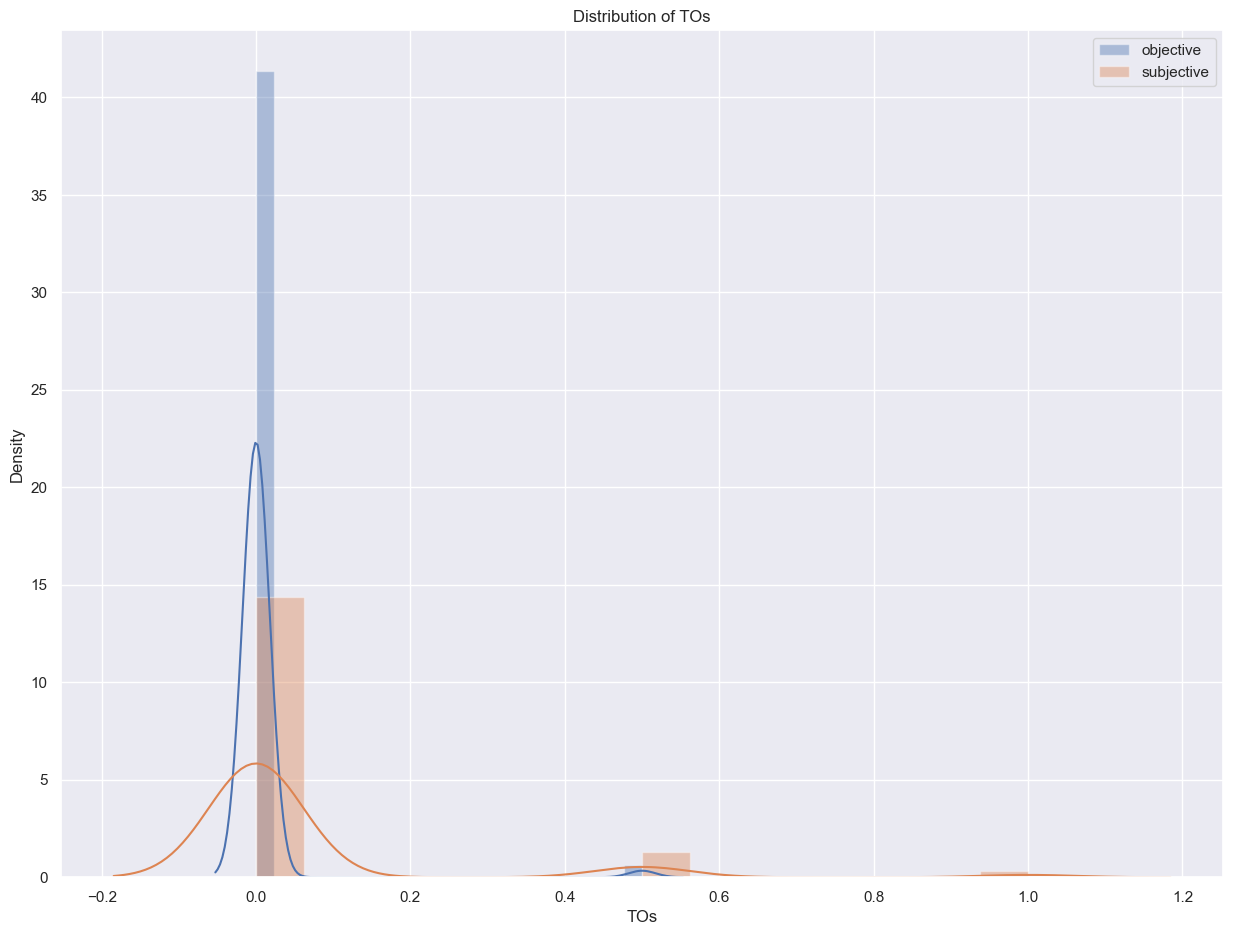

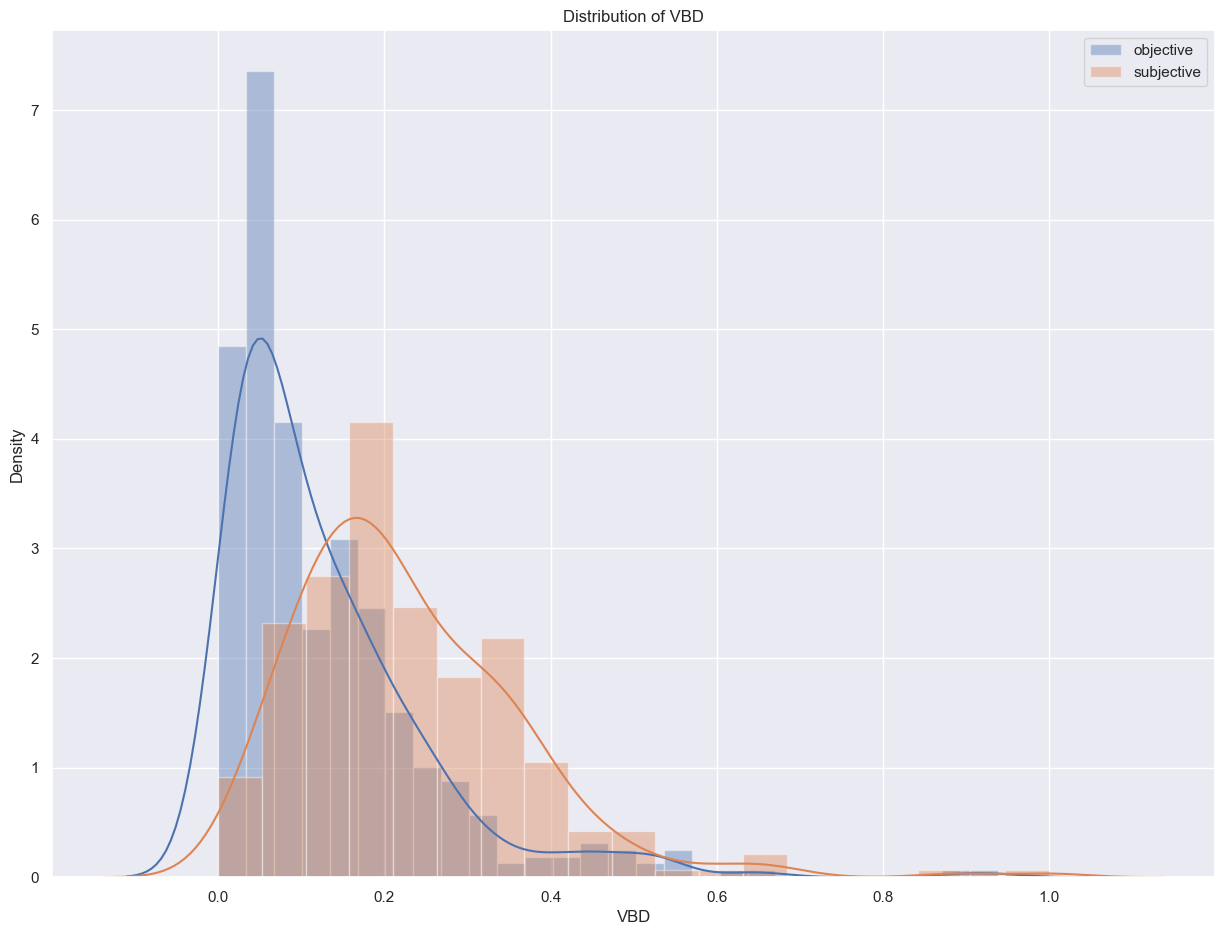

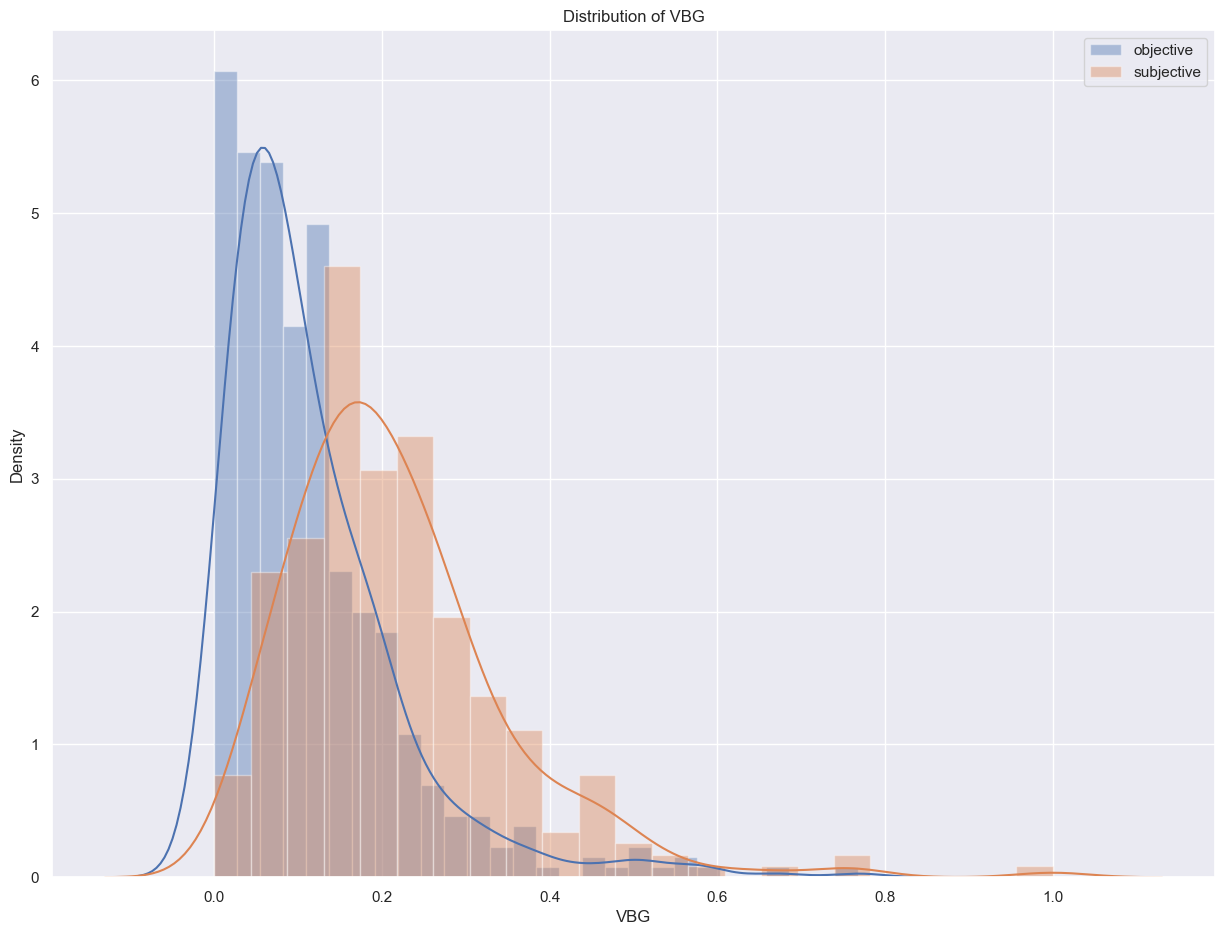

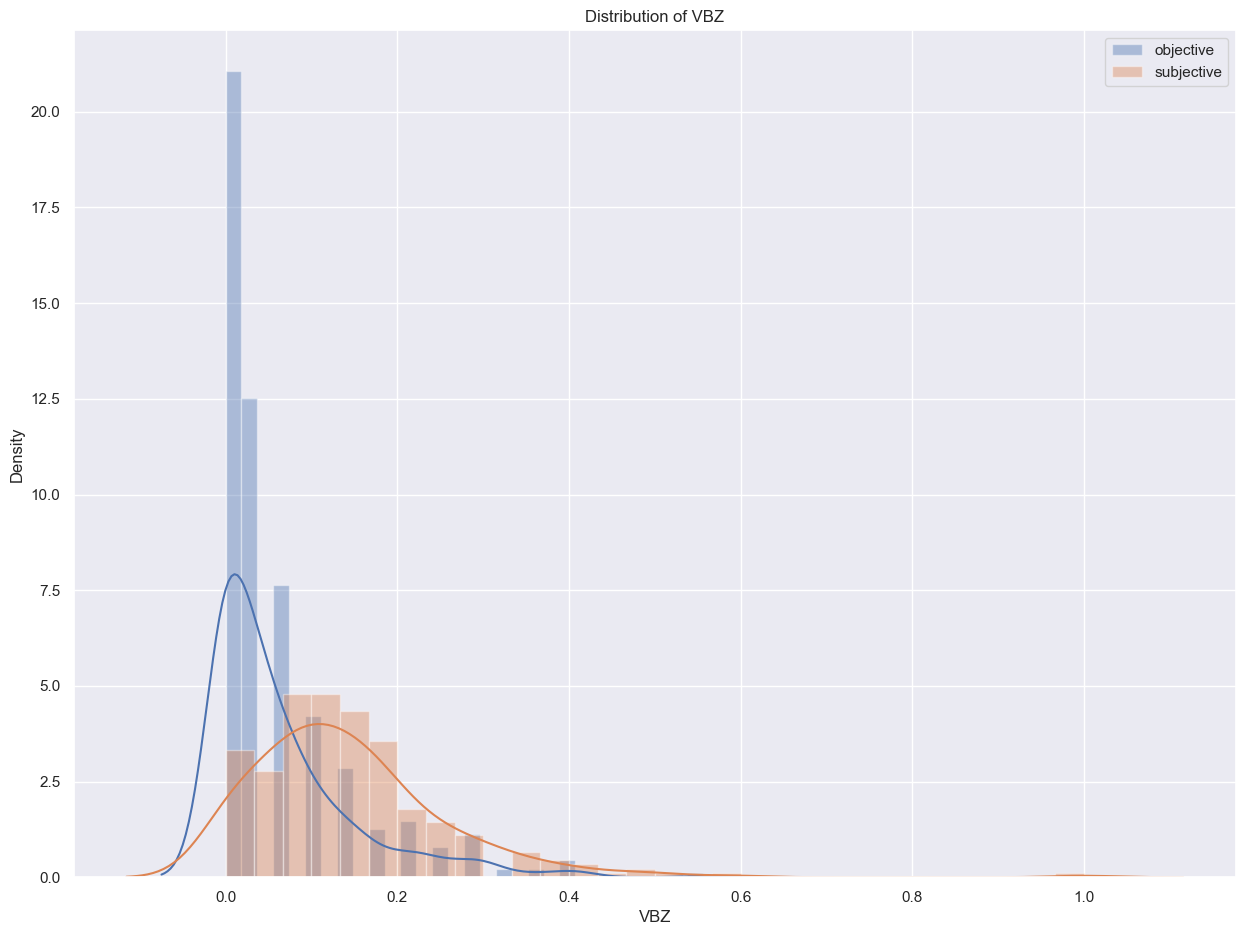

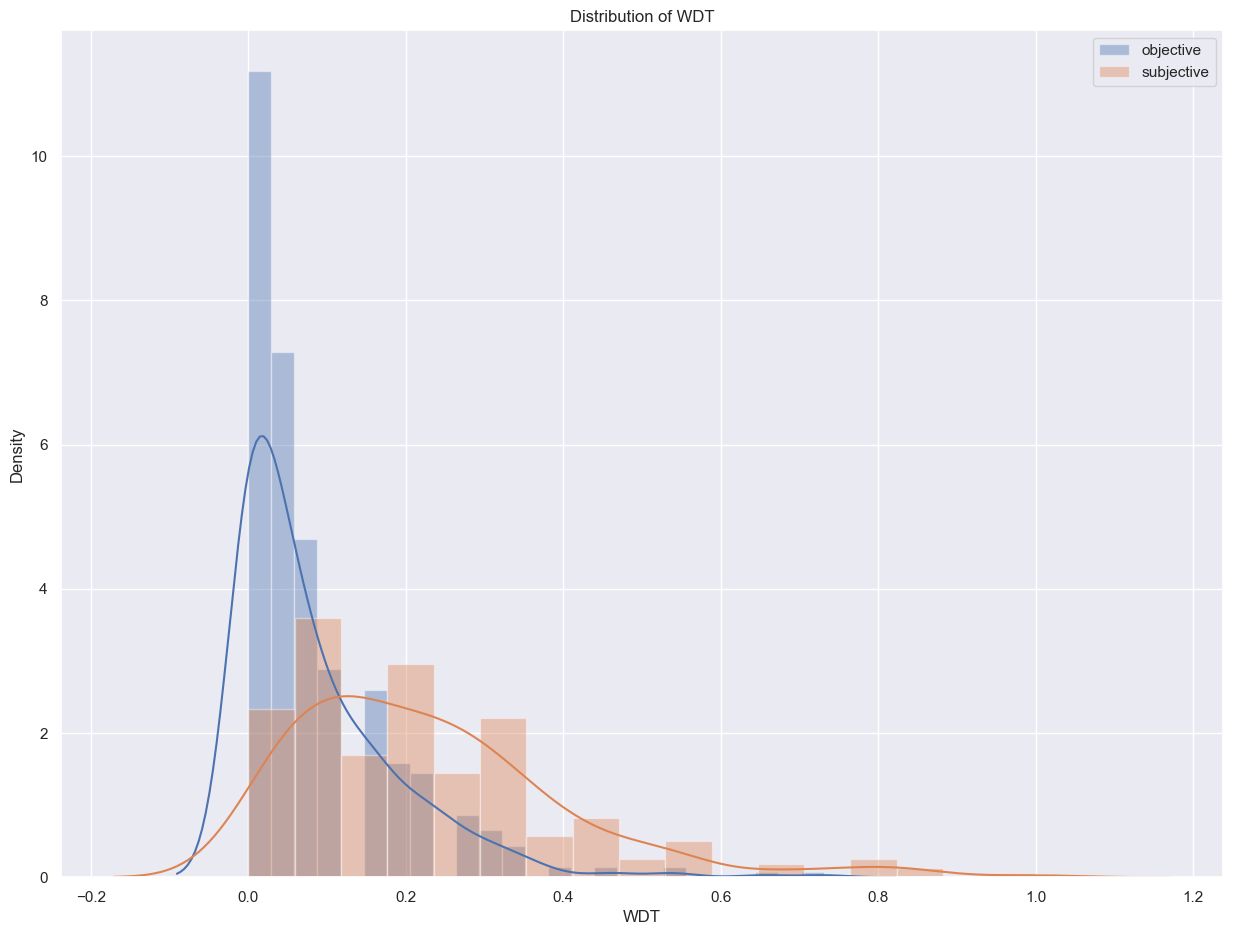

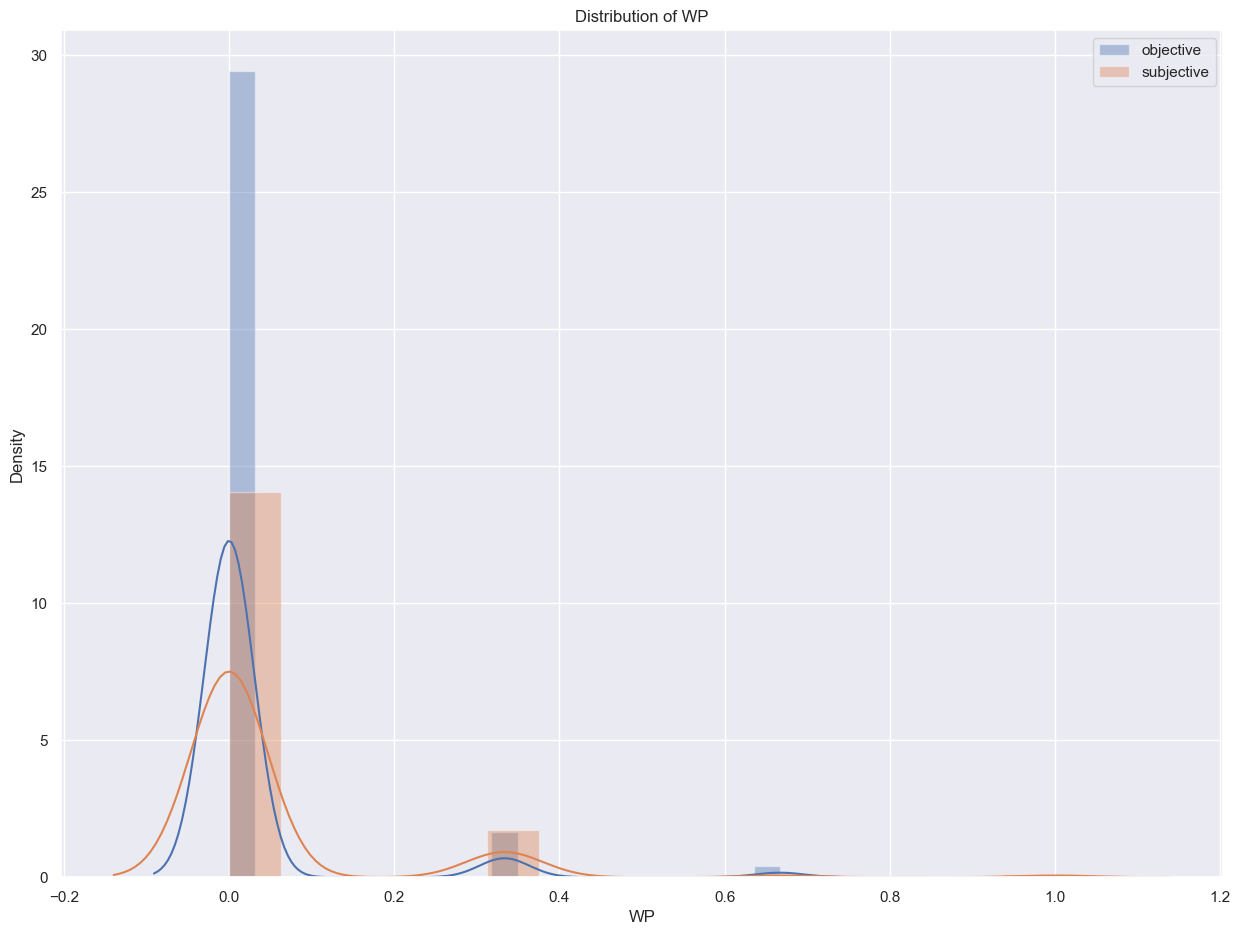

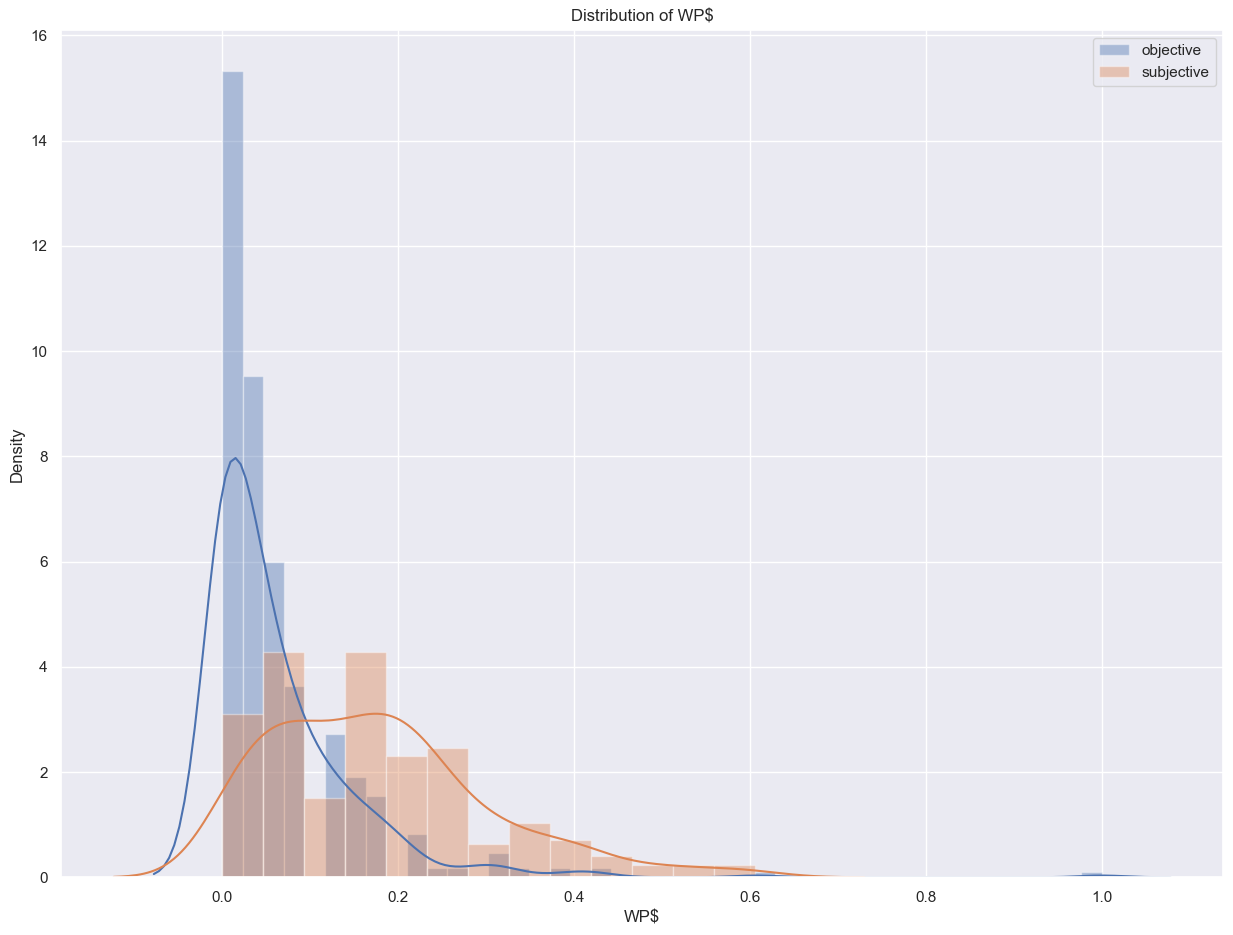

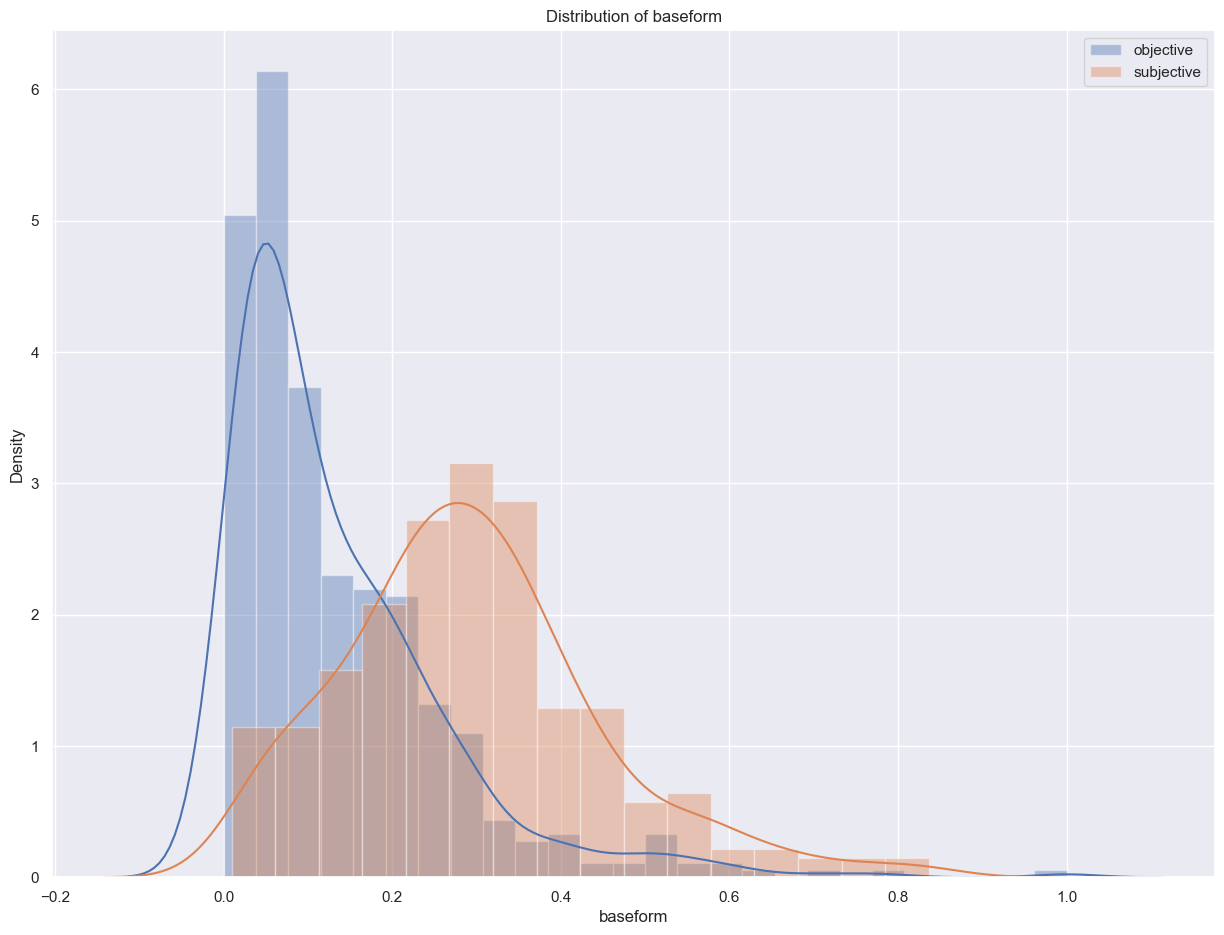

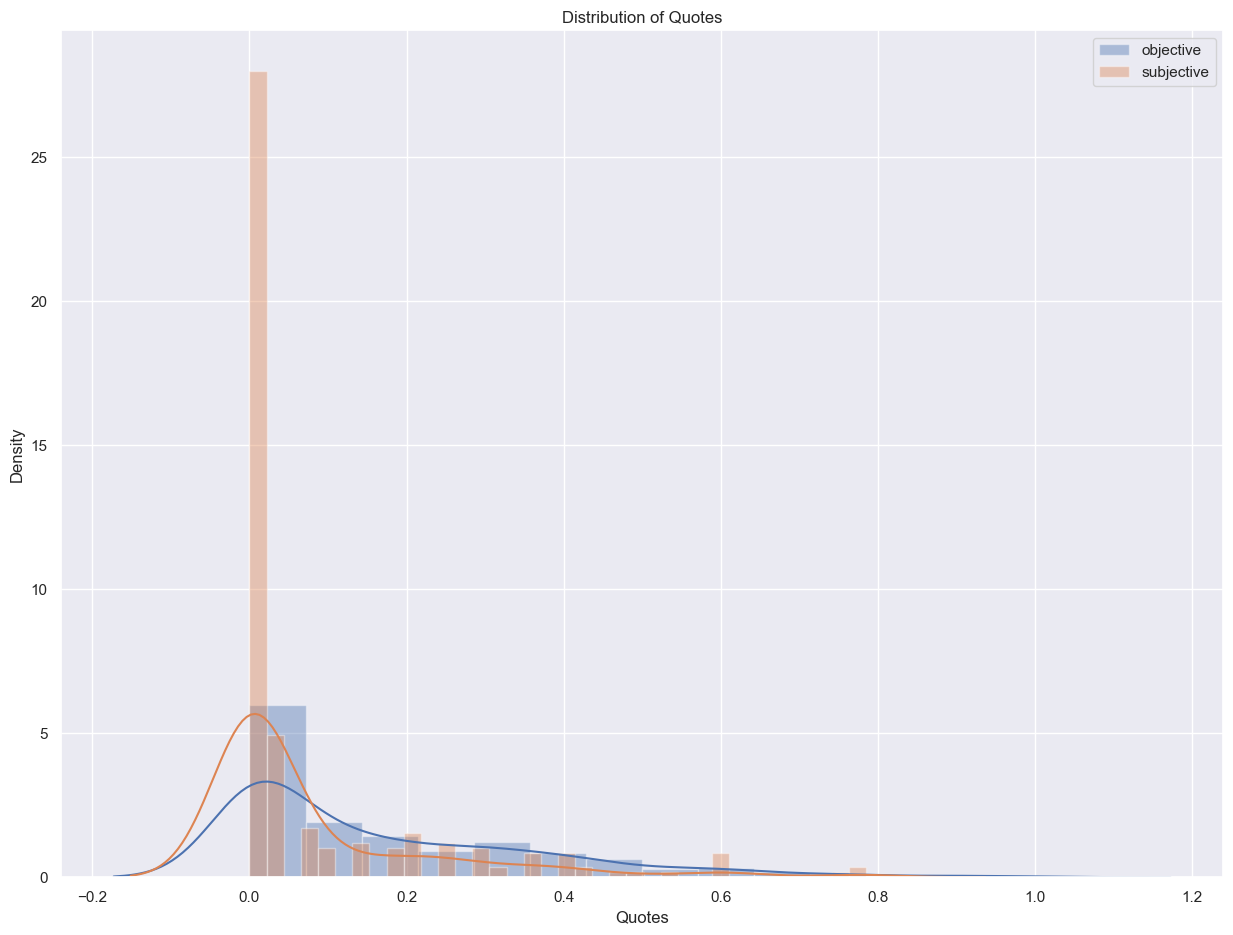

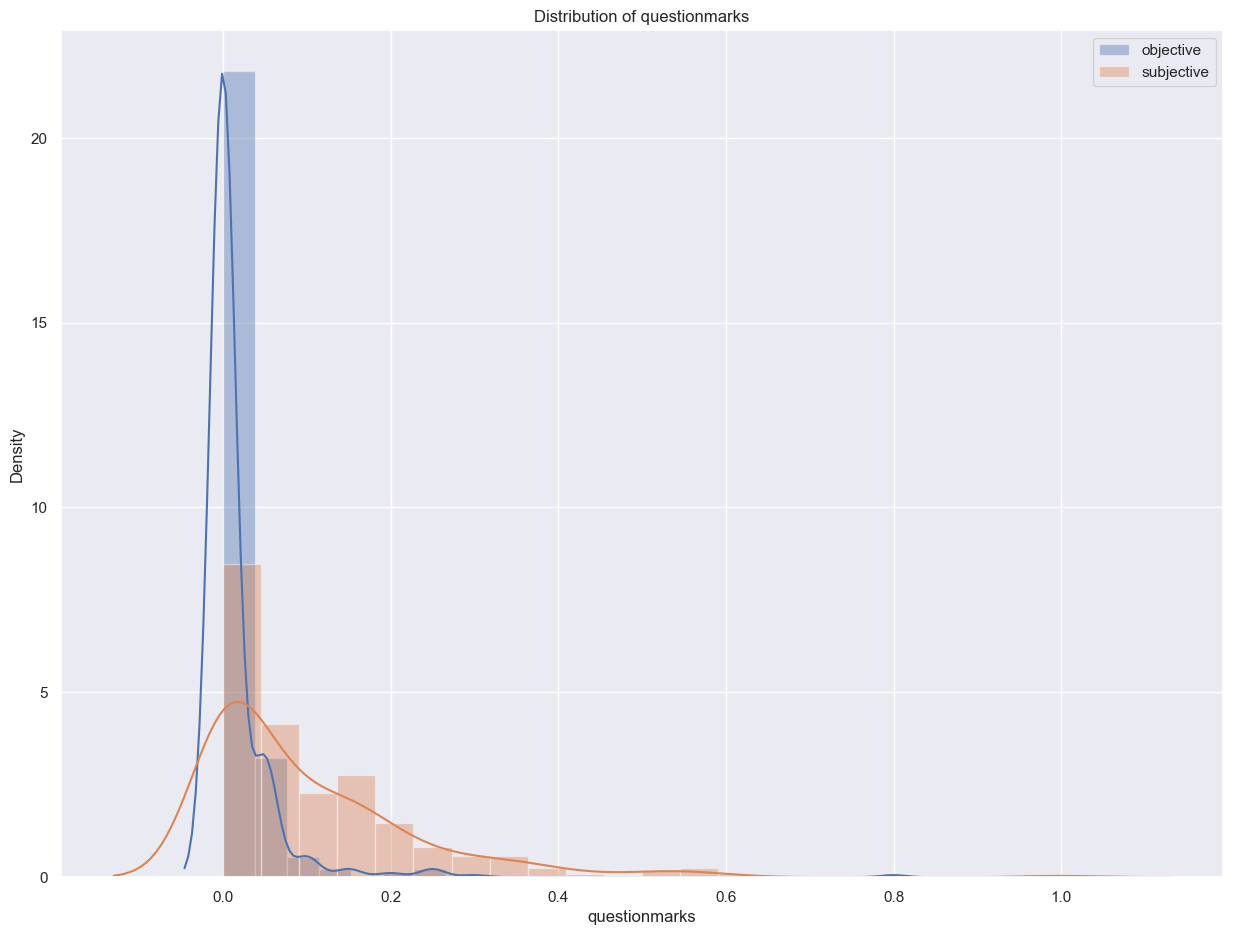

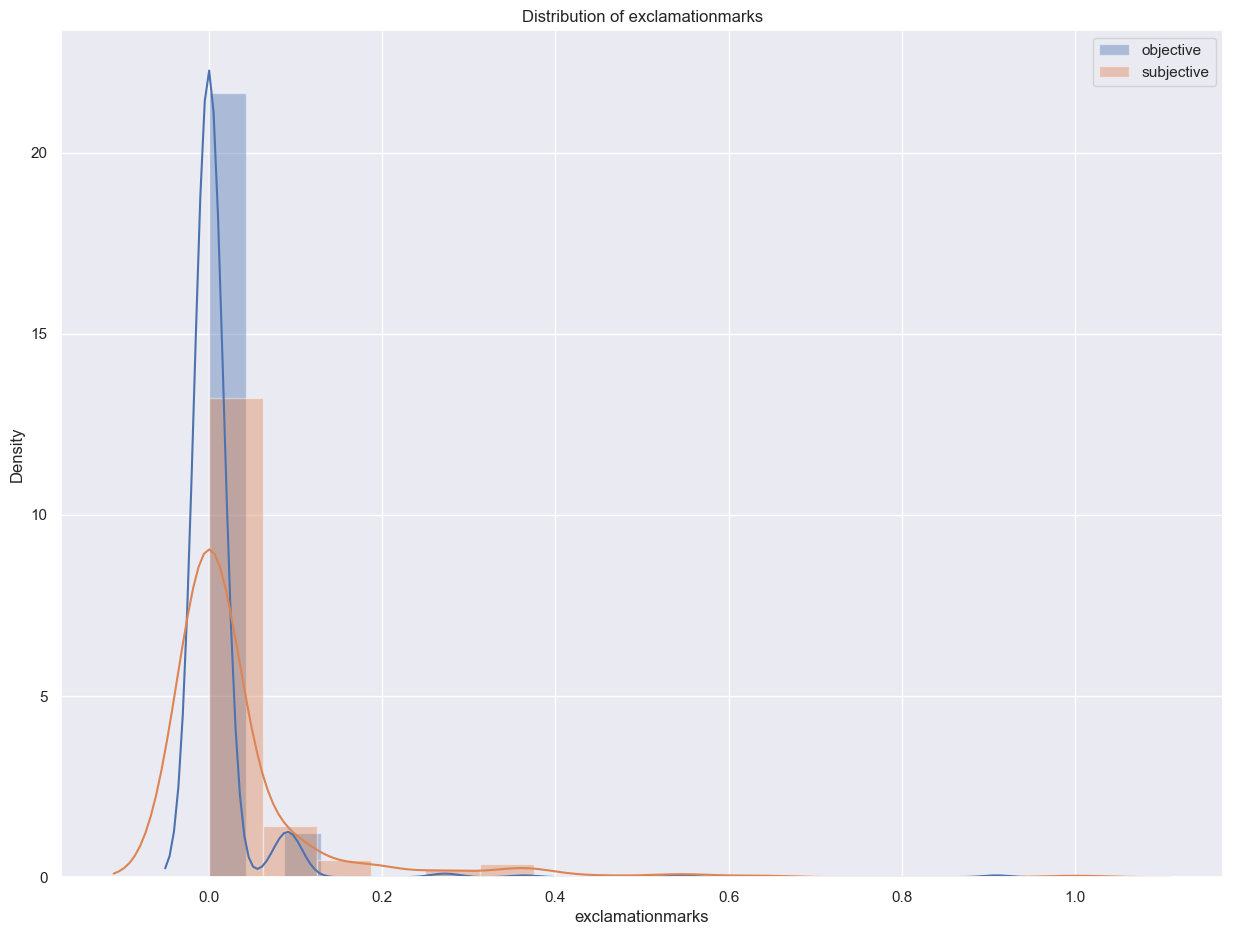

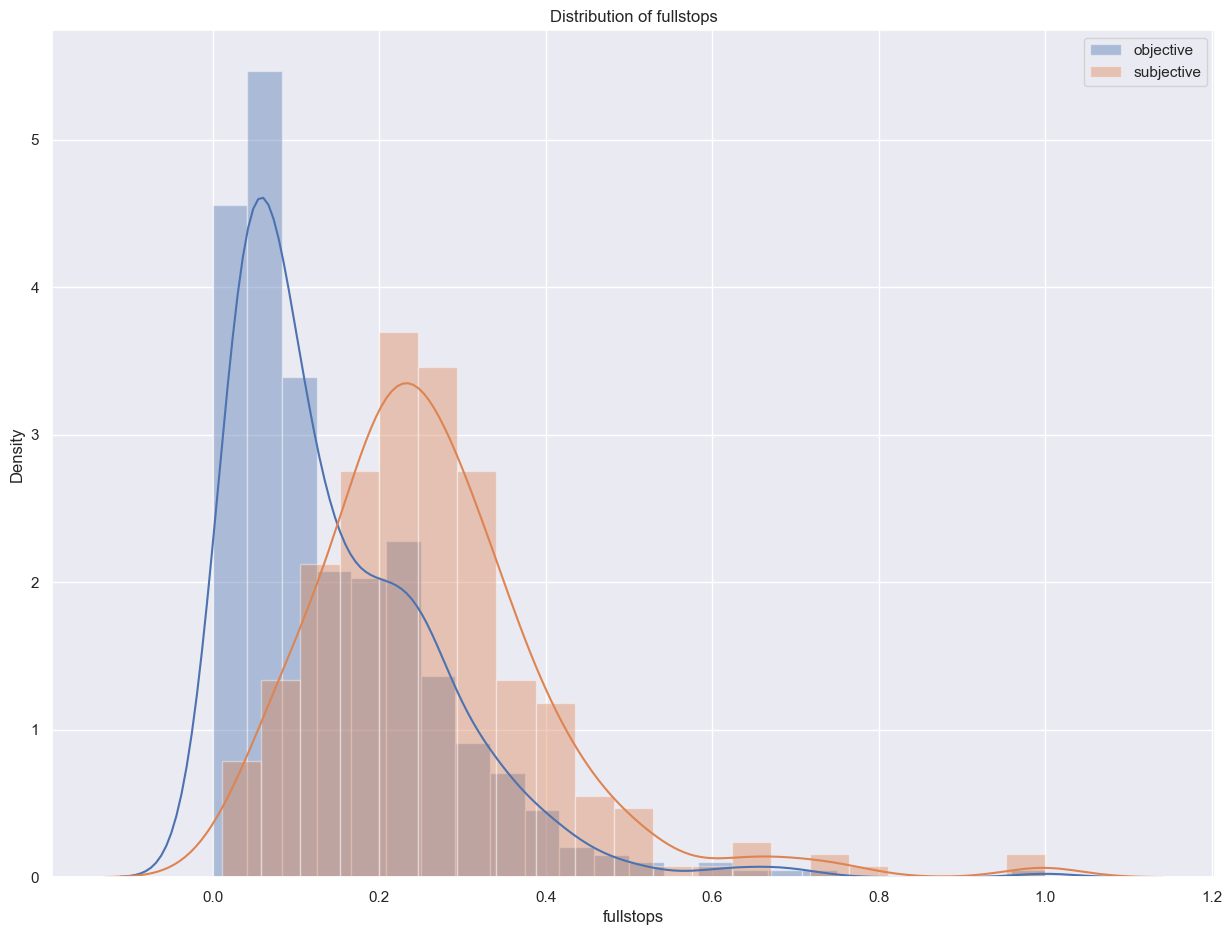

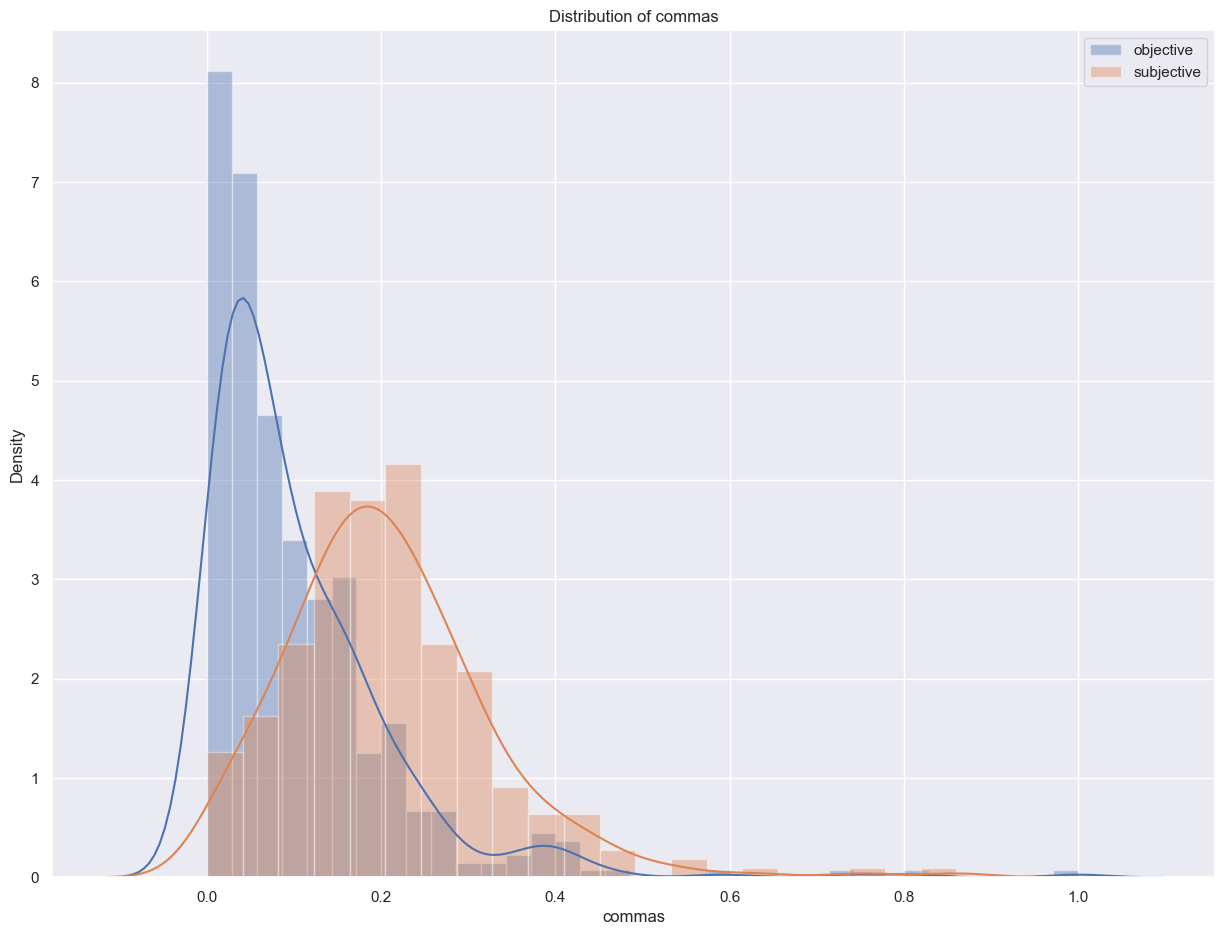

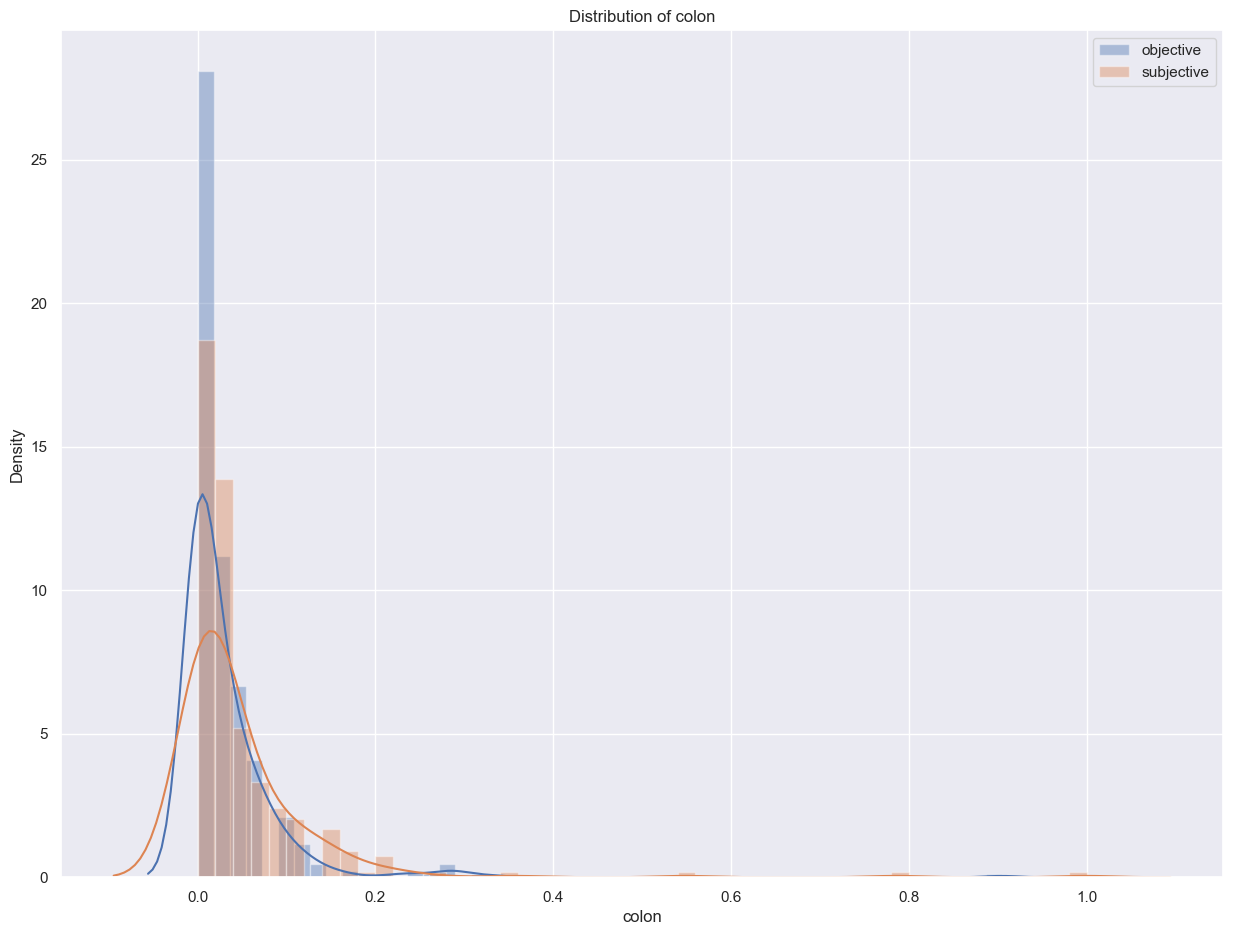

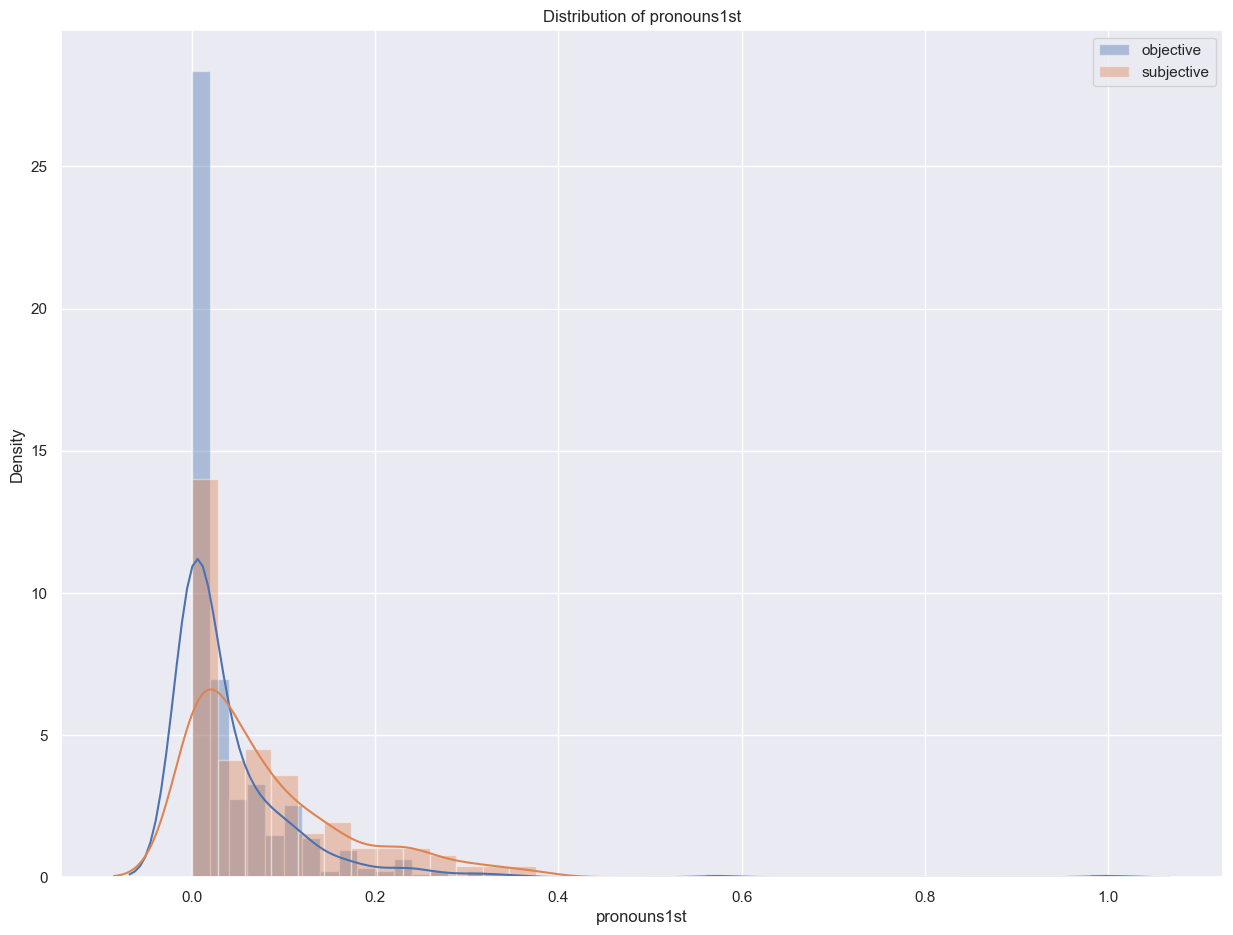

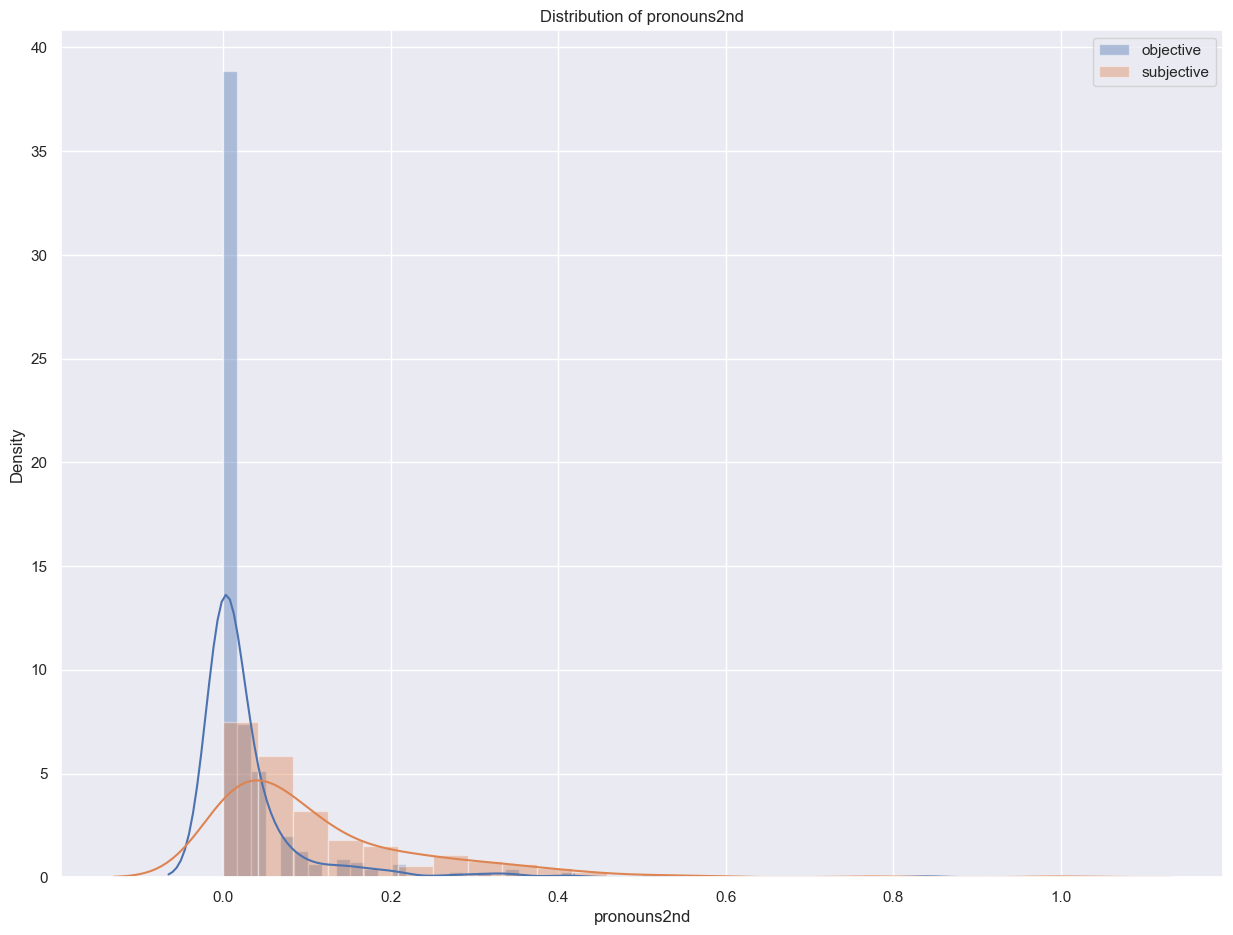

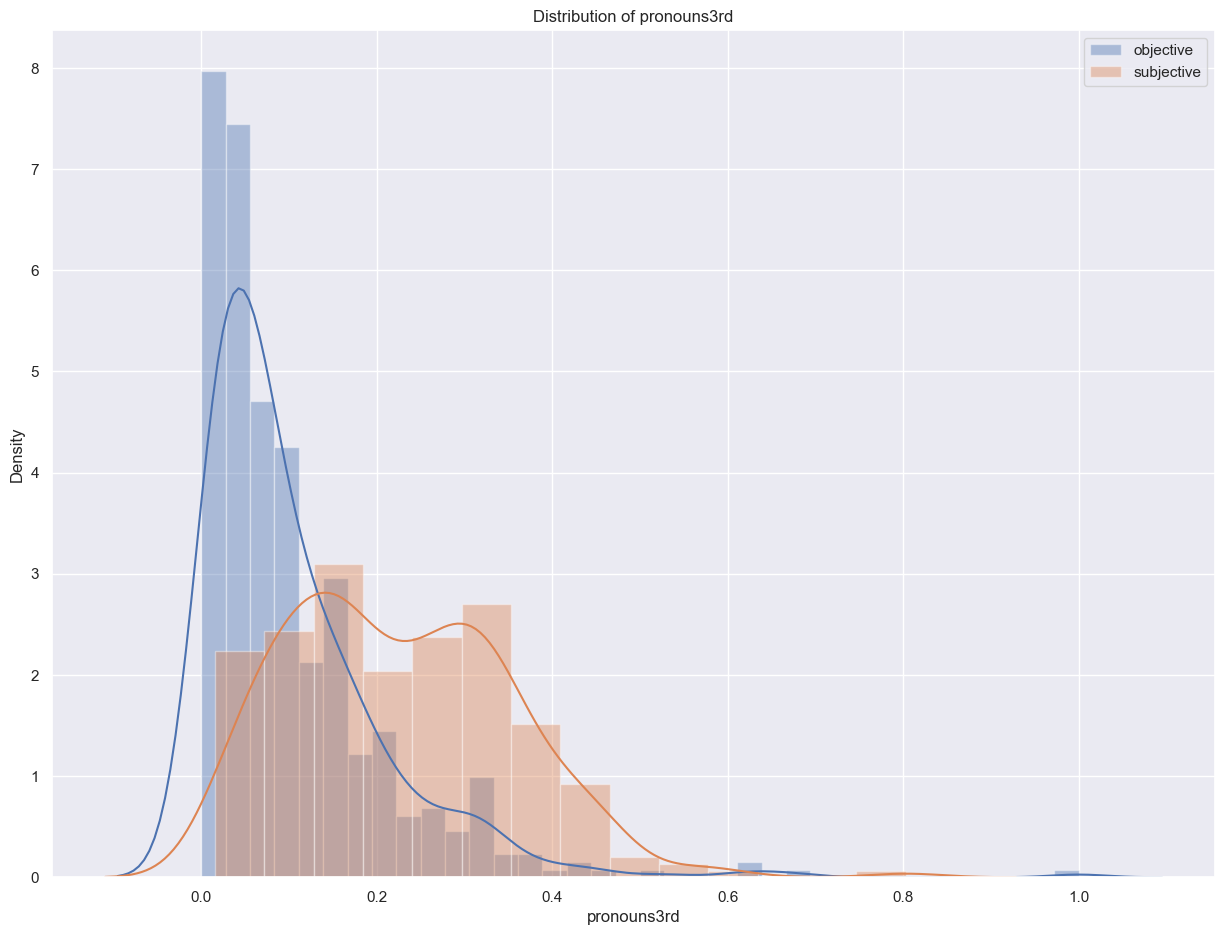

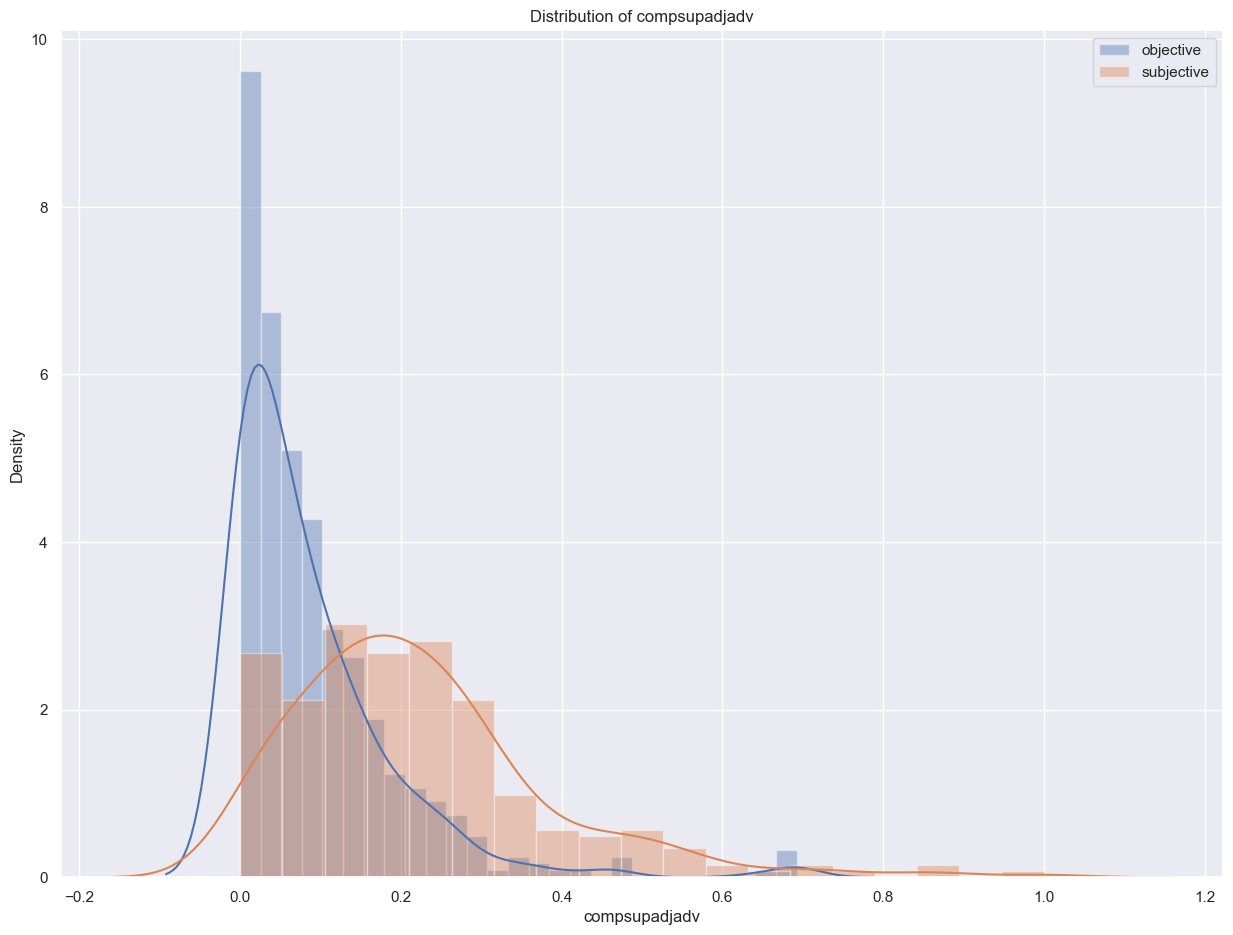

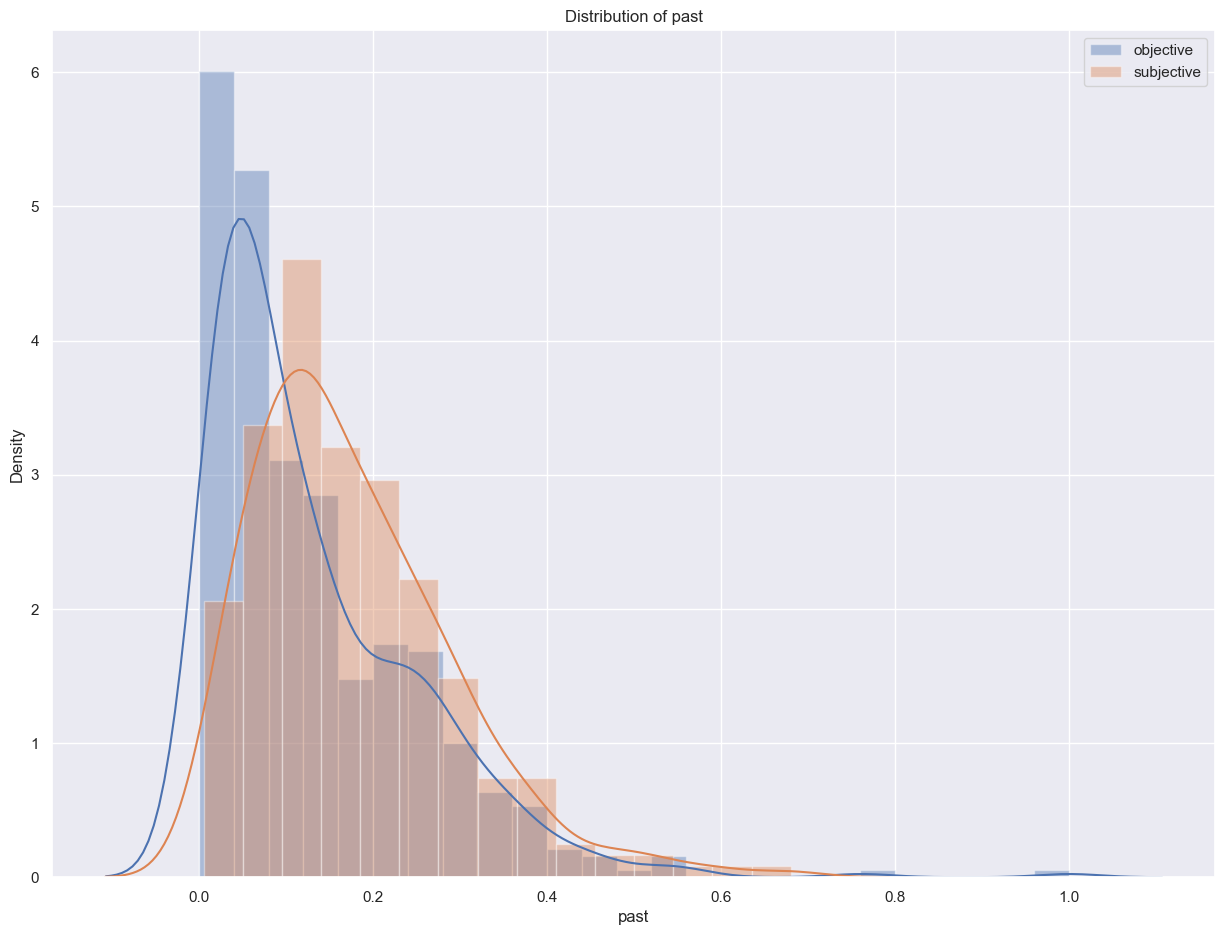

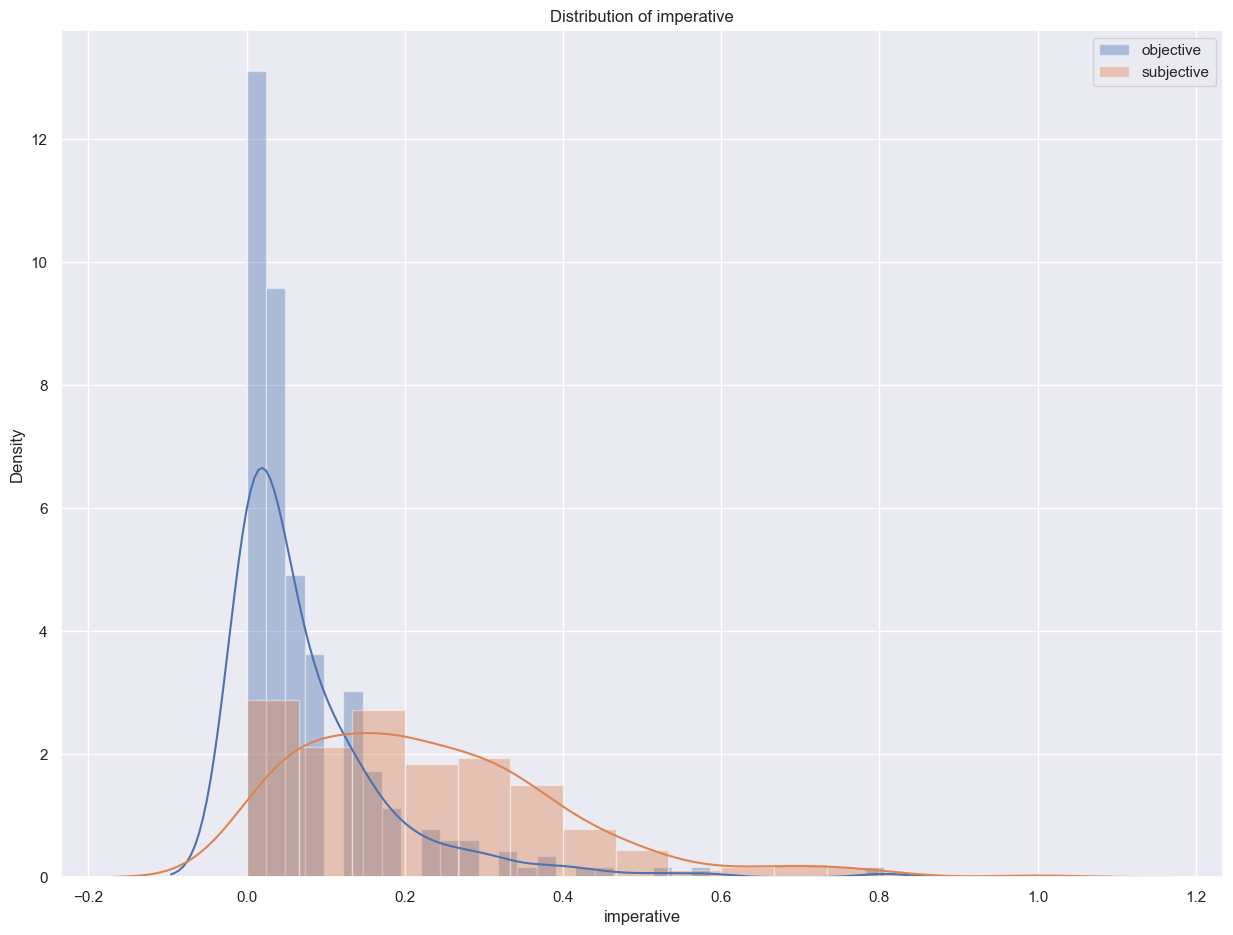

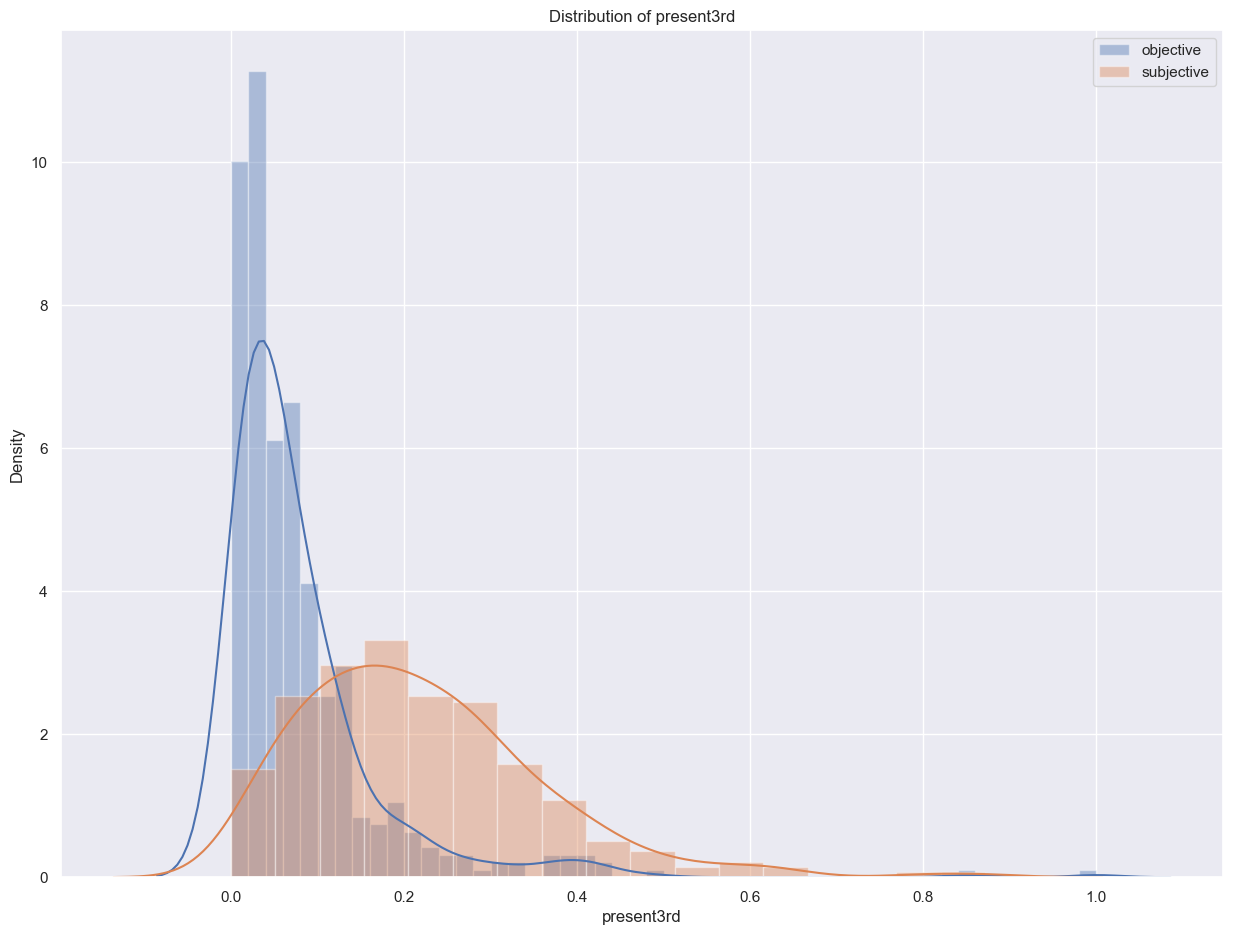

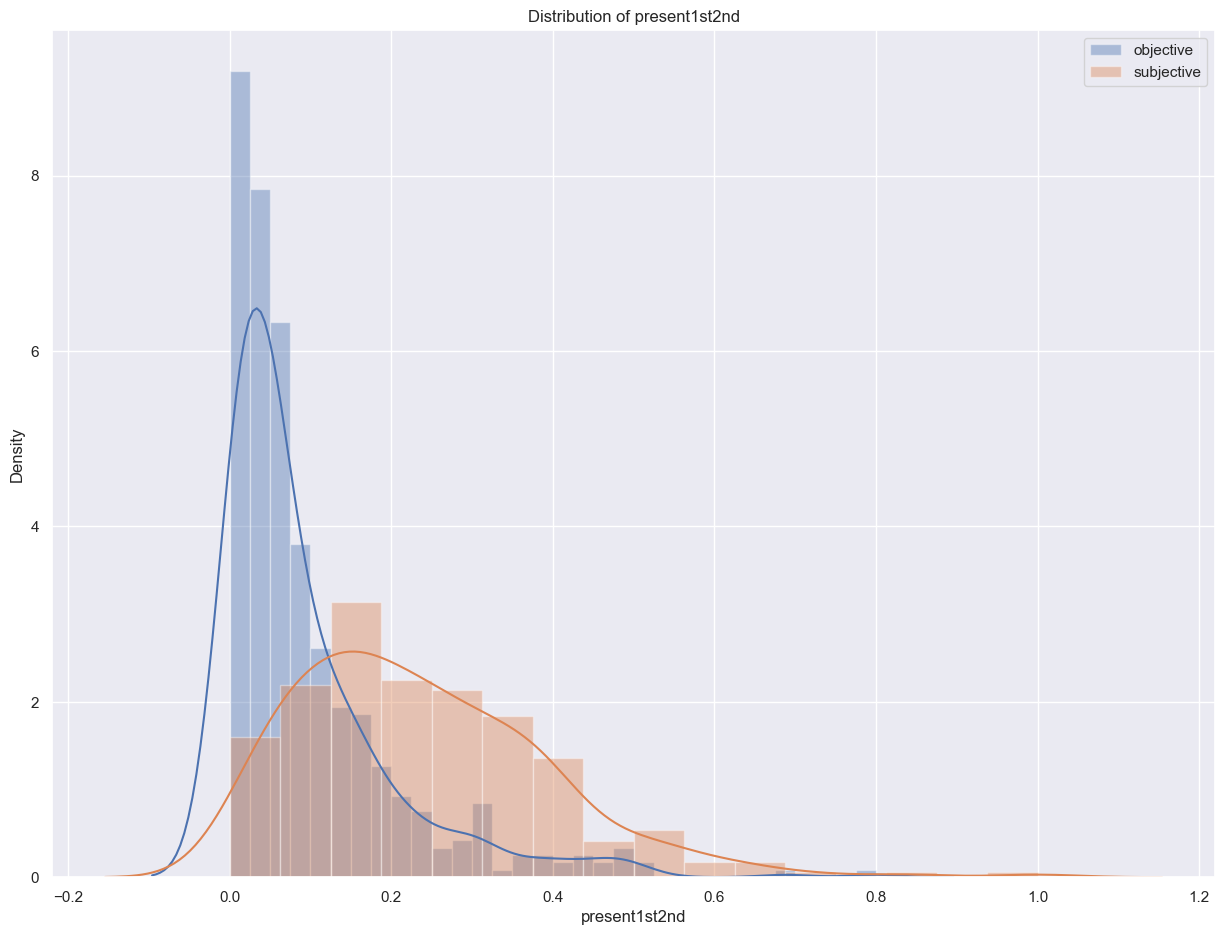

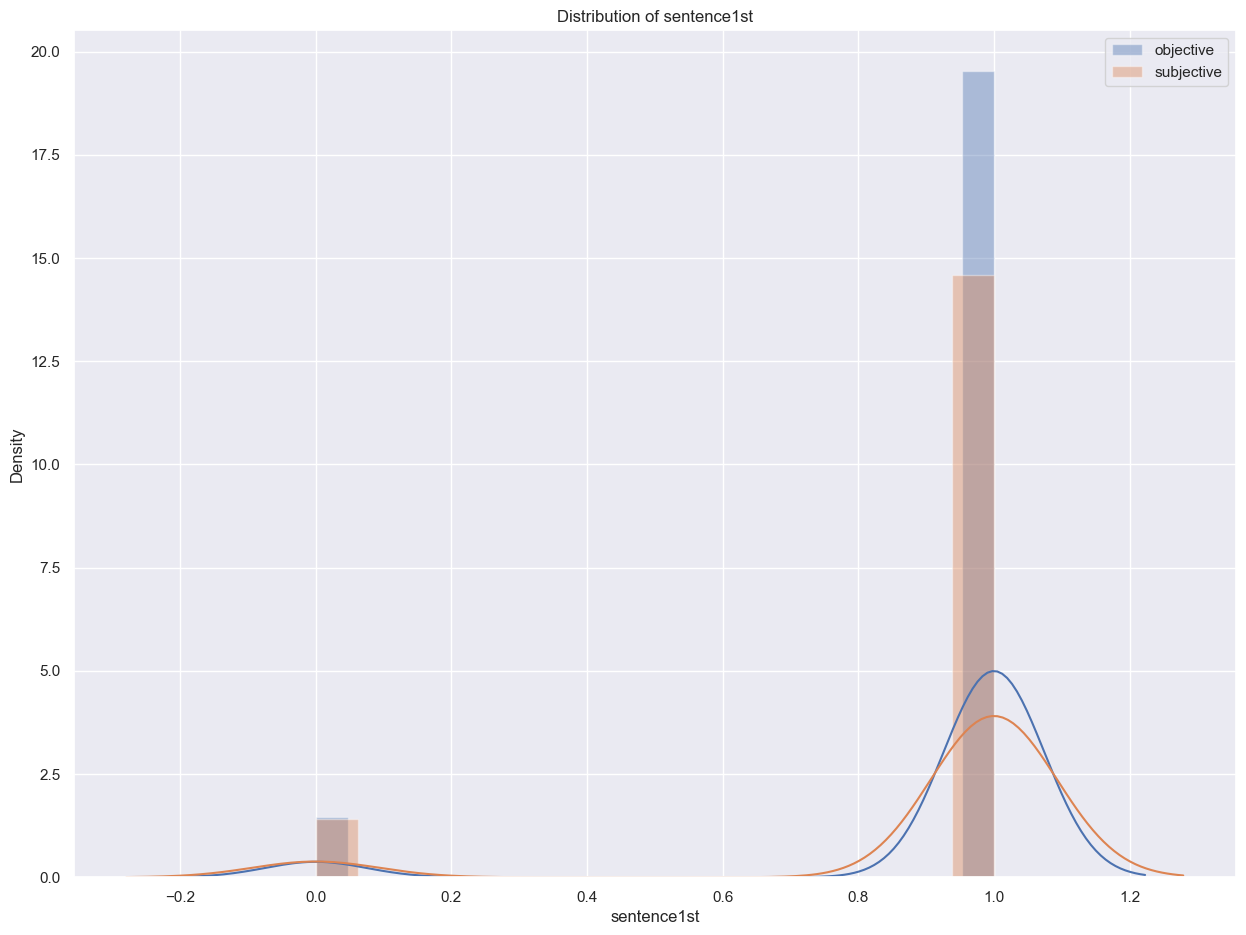

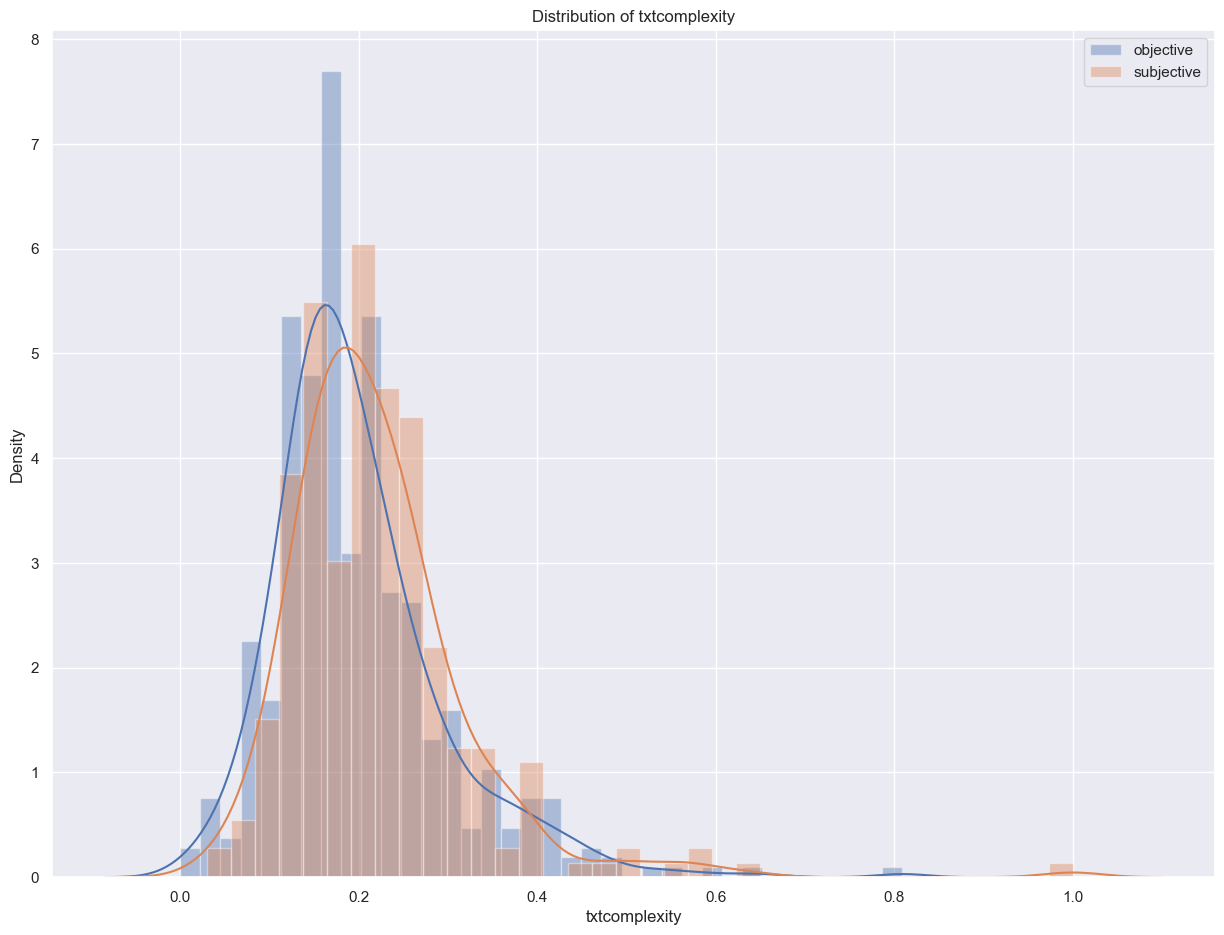

In [44]:
# INDICATOR DISTRIBUTION

for indicator in ind_train.columns:
    plt.title('Distribution of ' + indicator)
    #sb.displot(ind_train[indicator][l_train == 'objective'], label='objective', kde=True, stat="density")
    #sb.displot(ind_train[indicator][l_train == 'subjective'], label='subjective', kde=True, stat="density")
    
    sb.distplot(ind_train[indicator][l_train == 0], label='objective', norm_hist=True)
    sb.distplot(ind_train[indicator][l_train == 1], label='subjective', norm_hist=True)
    
    plt.xlabel(indicator)
    
    plt.legend(loc='best') #needed so the legend doesnt overlap
    
    plt.show()


Some indicators are not very useful in distinguish between data points, 'txtcomplexity' and 'CC' being some examples. But there's sevral other cases that allow this distintion ('totalWordsCount','semanticobjscore', etc.)

# Models

In [51]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score

In [52]:
kf = StratifiedKFold(n_splits=5, random_state=23, shuffle=True)
label_weight = {0: (l_train == 0).mean(), 1: 1 - (l_train == 0).mean()}

## KNN

In [57]:
%%time
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 202, 2)), 'weights': ['uniform', 'distance']} #knn performs better with 
grid_result = GridSearchCV(estimator=knn, cv=kf, param_grid=param_grid, scoring='roc_auc')
grid_result.fit(ind_train, l_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))  #best mean cross-validated score and best hyperparameters found


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
    print("mean: %f (stdev: %f) with param: %r" % (mean, stdev, param))

Best: 0.876575 using {'n_neighbors': 23, 'weights': 'distance'}
mean: 0.770108 (stdev: 0.021054) with param: {'n_neighbors': 1, 'weights': 'uniform'}
mean: 0.770108 (stdev: 0.021054) with param: {'n_neighbors': 1, 'weights': 'distance'}
mean: 0.840583 (stdev: 0.024892) with param: {'n_neighbors': 3, 'weights': 'uniform'}
mean: 0.845707 (stdev: 0.027806) with param: {'n_neighbors': 3, 'weights': 'distance'}
mean: 0.851989 (stdev: 0.028435) with param: {'n_neighbors': 5, 'weights': 'uniform'}
mean: 0.857428 (stdev: 0.028720) with param: {'n_neighbors': 5, 'weights': 'distance'}
mean: 0.855226 (stdev: 0.026171) with param: {'n_neighbors': 7, 'weights': 'uniform'}
mean: 0.861466 (stdev: 0.026982) with param: {'n_neighbors': 7, 'weights': 'distance'}
mean: 0.868083 (stdev: 0.030144) with param: {'n_neighbors': 9, 'weights': 'uniform'}
mean: 0.871516 (stdev: 0.030182) with param: {'n_neighbors': 9, 'weights': 'distance'}
mean: 0.862040 (stdev: 0.035752) with param: {'n_neighbors': 11, 'weigh

Best: 0.876575 using {'n_neighbors': 23, 'weights': 'distance'}

In [56]:
knn = KNeighborsClassifier(n_neighbors=23, weights='distance')
knn.fit(ind_train, l_train)
knn_prediction = knn.predict_proba(ind_test)
roc_auc_score(l_test, knn_prediction[:, 1])

0.843789122270135